<a href="https://colab.research.google.com/github/Nazneen-akram/coursera-rep/blob/main/EDA_NEW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA and Preprocessing

#### points  to remember while  doing EDA and preprocessing

1. The cost of misclassification is very high.
2. we want our model to be highly interpretable
3. The outliers may help for classification.

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split

In [62]:
## list of csv for healthcare provider fraud detection.
list_of_csv=os.listdir()
print(list_of_csv)

['.config', 'Train_Beneficiarydata-1542865627584.csv', 'Test_Beneficiarydata-1542969243754.csv', 'Test_Outpatientdata-1542969243754.csv', 'Test-1542969243754.csv', 'Train-1542865627584.csv', 'Train_Inpatientdata-1542865627584.csv', 'Train_Outpatientdata-1542865627584.csv', 'Test_Inpatientdata-1542969243754.csv', 'sample_data']


### Loading Train and Test data.

In [63]:
# train data
train_label=pd.read_csv('Train-1542865627584.csv')
train_beneficiary=pd.read_csv('Train_Beneficiarydata-1542865627584.csv')
train_inpatient=pd.read_csv('Train_Inpatientdata-1542865627584.csv')
train_outpatient=pd.read_csv('Train_Outpatientdata-1542865627584.csv')

# test data
test_label=pd.read_csv('Test-1542969243754.csv')
test_beneficiary=pd.read_csv('Test_Beneficiarydata-1542969243754.csv')
test_inpatient=pd.read_csv('Test_Inpatientdata-1542969243754.csv')
test_outpatient=pd.read_csv('Test_Outpatientdata-1542969243754.csv')

## EDA on train data

### Trian label

In [64]:
train_label.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [65]:
#checking tain_label information
train_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        5410 non-null   object
 1   PotentialFraud  5410 non-null   object
dtypes: object(2)
memory usage: 84.7+ KB


In [66]:
# checking if any values  is missing or null
train_label['PotentialFraud'].isnull().any()

False

percentage of Fradus in data  9.353
percentage of Non Frauds in data  90.647


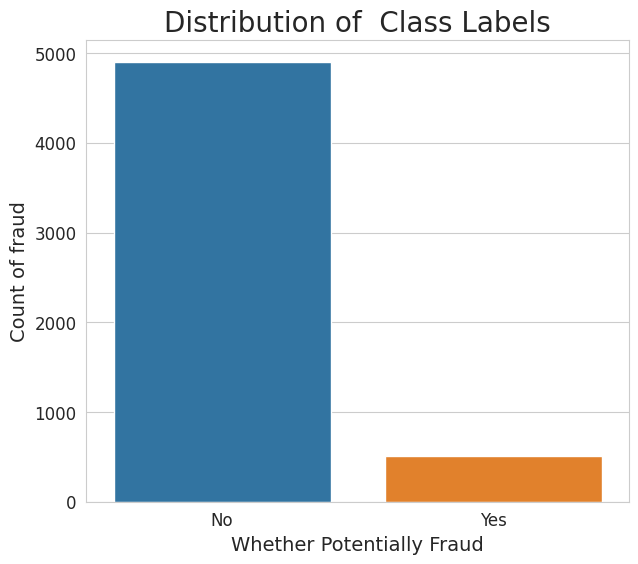

In [67]:
# checking how much data is point is fraud or not  fraud present in our data set
plt.figure(figsize=(7,6)) # hight and width of plot
sns.set_style('whitegrid') # backgroud of plot
sns.countplot(data=train_label,x='PotentialFraud') # conting unique values
plt.xticks(size = 12) # size of x axis indicators(yes/no)
plt.yticks(size = 12)
plt.title('Distribution of  Class Labels', fontsize=20)
plt.xlabel('Whether Potentially Fraud', size = 14)
plt.ylabel('Count of fraud', size = 14)
count=train_label['PotentialFraud'].value_counts()
no=np.round((count[0]/(count[0]+count[1]))*100,4)
yes=np.round((count[1]/(count[0]+count[1]))*100,4)
print('percentage of Fradus in data ', yes)
print('percentage of Non Frauds in data ', no)
plt.show()


### Observations
 1.There is no missing valus in class labels(Potential_frauds)

 2.Data is highly imbanced

In [68]:
#replacing yes or no with 0 and 1
# 0 = non fruad
# 1 = fraud
train_label['PotentialFraud']=train_label['PotentialFraud'].replace('Yes',1)
train_label['PotentialFraud']=train_label['PotentialFraud'].replace('No',0)
print(train_label.head())

   Provider  PotentialFraud
0  PRV51001               0
1  PRV51003               1
2  PRV51004               0
3  PRV51005               1
4  PRV51007               0


## Beneficiary data

In [69]:
train_beneficiary.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [70]:
# checking train_beneficiary information
train_beneficiary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

In [71]:
#checking weather a column has Nan values or not
train_bene_col=train_beneficiary.columns
for i in train_bene_col:
    print(i,"=",train_beneficiary[i].isnull().any())

BeneID = False
DOB = False
DOD = True
Gender = False
Race = False
RenalDiseaseIndicator = False
State = False
County = False
NoOfMonths_PartACov = False
NoOfMonths_PartBCov = False
ChronicCond_Alzheimer = False
ChronicCond_Heartfailure = False
ChronicCond_KidneyDisease = False
ChronicCond_Cancer = False
ChronicCond_ObstrPulmonary = False
ChronicCond_Depression = False
ChronicCond_Diabetes = False
ChronicCond_IschemicHeart = False
ChronicCond_Osteoporasis = False
ChronicCond_rheumatoidarthritis = False
ChronicCond_stroke = False
IPAnnualReimbursementAmt = False
IPAnnualDeductibleAmt = False
OPAnnualReimbursementAmt = False
OPAnnualDeductibleAmt = False


In [72]:
# cheking unique values in categorigal featues
train_bene_col=train_beneficiary.columns
train_bene_col=list(train_bene_col)
train_bene_col=train_bene_col[3:-4] # removing DOB,DOD and other continues feateus.
for i in train_bene_col:
    print(i,"=",train_beneficiary[i].unique())

Gender = [1 2]
Race = [1 2 3 5]
RenalDiseaseIndicator = ['0' 'Y']
State = [39 52 24 23 45 15 44 41  1 14  7 13 34 31  5 49 46  6 38 10 26  3 20 33
 18 27 51 29 42 36 11 12 30 19  4 25 17 16 32  2 21 50 22 54 28 43 35 37
 47  8  9 53]
County = [230 280 590 270 680 810 610 140  30 360 982  10 780 400 120  50 470  20
 892 200 170 500 710 760  90 130 141 150 700 390 620 260 930 734 250 510
  60 563 570  40 340 100 290 660 350 770 180 460 580 430 880 690 310 550
 190 490 600 220 790 990 370 420   0 980 480 450 960 160 800 410 520 380
 991 110 540 910 240 440  70 860 640 870 560 650 830 330 820  25 451 320
 530 831 950  80 921 940 630 720 989 331 840 758 421 722 730 561 750 791
 947 551 801 953 411 681 300 970 757 241 210 988 890 756 221 843 581 702
 999  11 711 670 328 943 981 591 754 986 431 194 885 740 900 871 641 653
 911 879 992 622 291 812 562 976 920 311 288 752 811 850 191 461 821 223
 792 984 611 882 794 891 962 983 772 842 341 841 211 511 971 881 564 541
 948 913 941 391  55 888 63



### Preprocessing


1. only data of death column has Nan values
2. we have to change gender to 1 and 0 from 1 and 2.(for  easy interpritaion)
3. In RenalDiseaseIndicator we have to replace Y with 1.
4. we have to make weather a beneficiary has chronic condition or not by replacing 2 with 0 (no cronic condition).From this we can add another feature called Total_chronic_condition by simply adding them.

In [73]:
# replacing 2 with 0 in gender, train_beneficary[gender]
train_beneficiary['Gender']=train_beneficiary['Gender'].replace(2,0)
train_beneficiary['Gender'].head()
# replacing in test beneficary data
test_beneficiary['Gender']=test_beneficiary['Gender'].replace(2,0)
test_beneficiary['Gender'].head()

0    1
1    1
2    0
3    0
4    0
Name: Gender, dtype: int64

percentage of gender 1  42.9068
percentage of gender O  57.0932


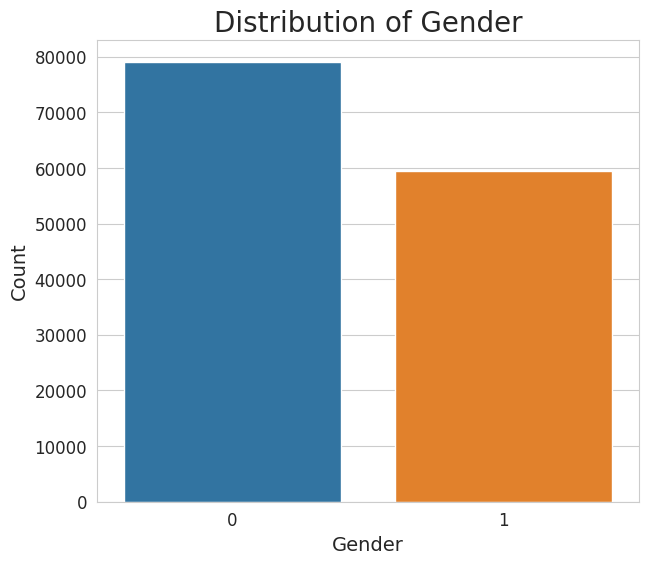

In [74]:
# ditribution plot of gender
plt.figure(figsize=(7,6)) # hight and width of plot
sns.set_style('whitegrid') # backgroud of plot
sns.countplot(data=train_beneficiary,x='Gender') # conting unique values
plt.xticks(size = 12) # size of x axis indicators(yes/no)
plt.yticks(size = 12)
plt.title('Distribution of Gender', fontsize=20)
plt.xlabel('Gender', size = 14)
plt.ylabel('Count', size = 14)
count=train_beneficiary['Gender'].value_counts()
no=np.round((count[0]/(count[0]+count[1]))*100,4)
yes=np.round((count[1]/(count[0]+count[1]))*100,4)
print('percentage of gender 1 ', yes)
print('percentage of gender O ', no)
plt.show()

### Observations
1. gender_0 is 57.09% and gender_1 is 42.02%
2. The gernder are balanced in beneficiary data set.

##### RenalDiseaseIndicator


In [75]:
# replacing Y with 1 in RenalDiseaseIndicator
train_beneficiary['RenalDiseaseIndicator']=train_beneficiary['RenalDiseaseIndicator'].replace('Y',1)
# repacling in test data
test_beneficiary['RenalDiseaseIndicator']=test_beneficiary['RenalDiseaseIndicator'].replace('Y',1)
test_beneficiary['RenalDiseaseIndicator'].head()

0    0
1    0
2    0
3    0
4    1
Name: RenalDiseaseIndicator, dtype: object

##### chronic condition

In [76]:
# replacing 2, with 0 in all 10 chronic condition, here we considering zero as no chornic condition
train_beneficiary['ChronicCond_Alzheimer']=train_beneficiary['ChronicCond_Alzheimer'].replace(2,0)
train_beneficiary['ChronicCond_Cancer']=train_beneficiary['ChronicCond_Cancer'].replace(2,0)
train_beneficiary['ChronicCond_Depression']=train_beneficiary['ChronicCond_Depression'].replace(2,0)
train_beneficiary['ChronicCond_Diabetes']=train_beneficiary['ChronicCond_Diabetes'].replace(2,0)
train_beneficiary['ChronicCond_Heartfailure']=train_beneficiary['ChronicCond_Heartfailure'].replace(2,0)
train_beneficiary['ChronicCond_IschemicHeart']=train_beneficiary['ChronicCond_IschemicHeart'].replace(2,0)
train_beneficiary['ChronicCond_KidneyDisease']=train_beneficiary['ChronicCond_KidneyDisease'].replace(2,0)
train_beneficiary['ChronicCond_ObstrPulmonary']=train_beneficiary['ChronicCond_ObstrPulmonary'].replace(2,0)
train_beneficiary['ChronicCond_Osteoporasis']=train_beneficiary['ChronicCond_Osteoporasis'].replace(2,0)
train_beneficiary['ChronicCond_rheumatoidarthritis']=train_beneficiary['ChronicCond_rheumatoidarthritis'].replace(2,0)
train_beneficiary['ChronicCond_stroke']=train_beneficiary['ChronicCond_stroke'].replace(2,0)

# replacing in test data
test_beneficiary['ChronicCond_Alzheimer']=test_beneficiary['ChronicCond_Alzheimer'].replace(2,0)
test_beneficiary['ChronicCond_Cancer']=test_beneficiary['ChronicCond_Cancer'].replace(2,0)
test_beneficiary['ChronicCond_Depression']=test_beneficiary['ChronicCond_Depression'].replace(2,0)
test_beneficiary['ChronicCond_Diabetes']=test_beneficiary['ChronicCond_Diabetes'].replace(2,0)
test_beneficiary['ChronicCond_Heartfailure']=test_beneficiary['ChronicCond_Heartfailure'].replace(2,0)
test_beneficiary['ChronicCond_IschemicHeart']=test_beneficiary['ChronicCond_IschemicHeart'].replace(2,0)
test_beneficiary['ChronicCond_KidneyDisease']=test_beneficiary['ChronicCond_KidneyDisease'].replace(2,0)
test_beneficiary['ChronicCond_ObstrPulmonary']=test_beneficiary['ChronicCond_ObstrPulmonary'].replace(2,0)
test_beneficiary['ChronicCond_Osteoporasis']=test_beneficiary['ChronicCond_Osteoporasis'].replace(2,0)
test_beneficiary['ChronicCond_rheumatoidarthritis']=test_beneficiary['ChronicCond_rheumatoidarthritis'].replace(2,0)
test_beneficiary['ChronicCond_stroke']=test_beneficiary['ChronicCond_stroke'].replace(2,0)


train_beneficiary['ChronicCond_Alzheimer'].unique()

array([1, 0])

race

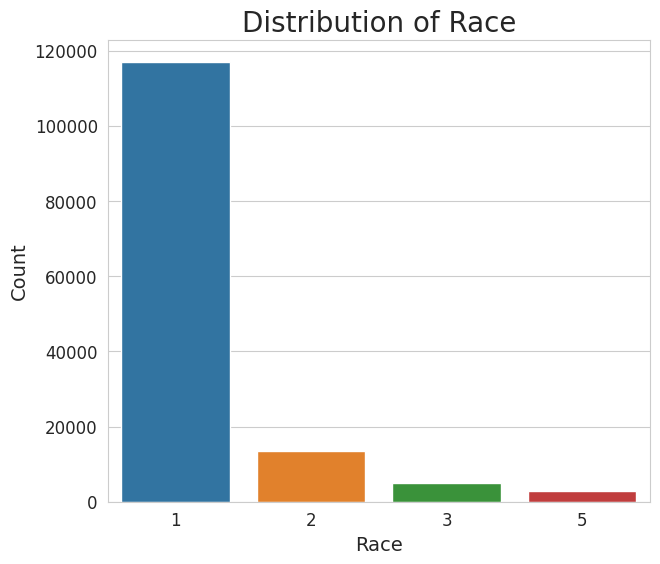

In [77]:
plt.figure(figsize=(7,6)) # hight and width of plot
sns.set_style('whitegrid') # backgroud of plot
sns.countplot(data=train_beneficiary,x='Race') # conting unique values
plt.xticks(size = 12) # size of x axis indicators(yes/no)
plt.yticks(size = 12)
plt.title('Distribution of Race', fontsize=20)
plt.xlabel('Race', size = 14)
plt.ylabel('Count', size = 14)
count=train_beneficiary['Gender'].value_counts()
plt.show()

### Observation
1. maximum of beneficary belongs to race 1 followed by race 2.
2. beneficary belongs to race 5 are very less.

country

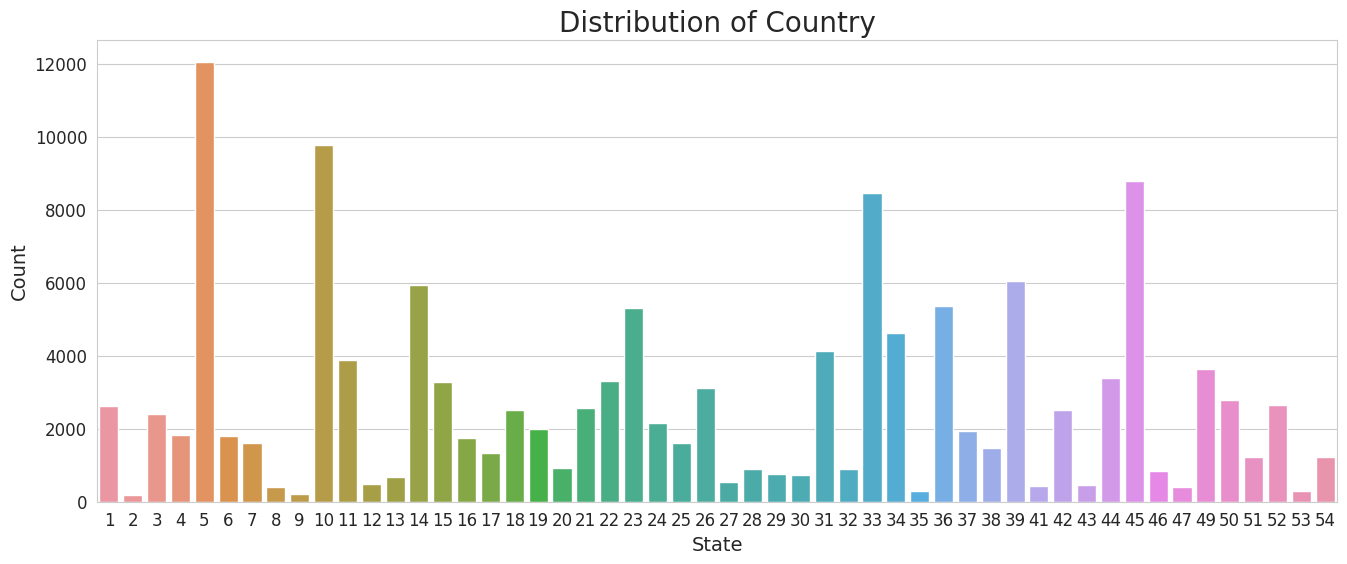

In [78]:
# county distribution
plt.figure(figsize=(16,6)) # hight and width of plot
sns.set_style('whitegrid') # backgroud of plot
sns.countplot(data=train_beneficiary,x='State') # conting unique values
plt.xticks(size = 12) # size of x axis indicators(yes/no)
plt.yticks(size = 12)
plt.title('Distribution of Country', fontsize=20)
plt.xlabel('State', size = 14)
plt.ylabel('Count', size = 14)
count=train_beneficiary['Gender'].value_counts()
plt.show()

### Observations
1. maximum beneficiary come from state code 5.
2. very less beneficiary come from state code 2.

##### continues featues


### IPAnnualReimbursementAmt

<ipython-input-79-d1afc2e18f38>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_beneficiary['IPAnnualReimbursementAmt']) # conting unique values


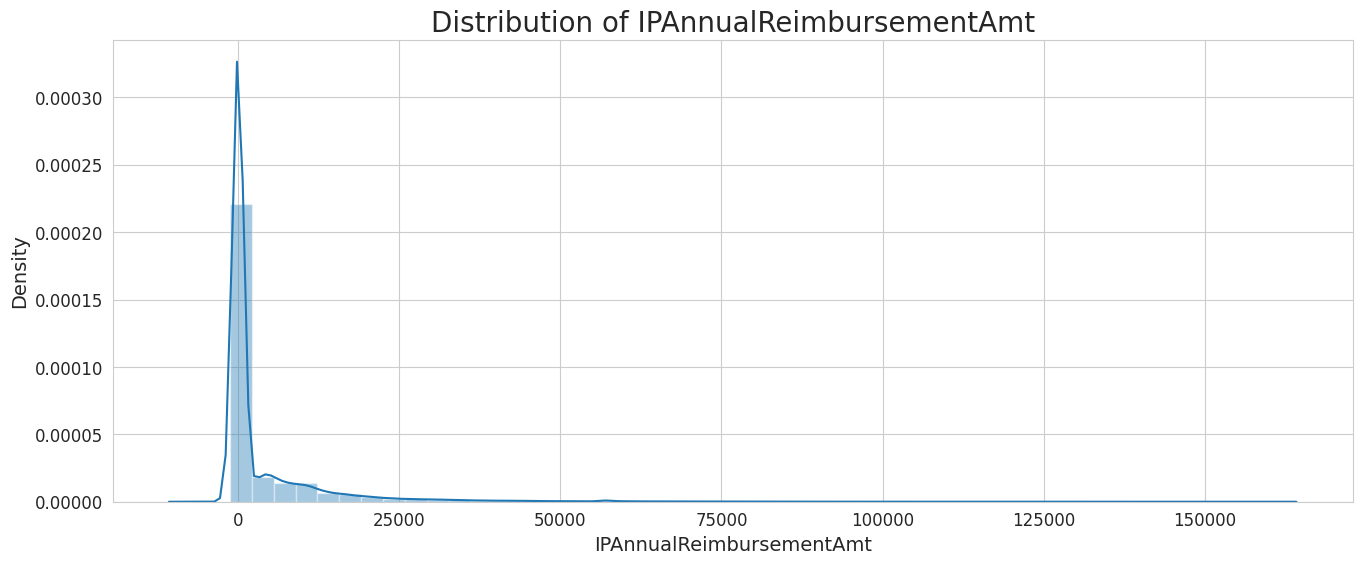

In [79]:
plt.figure(figsize=(16,6)) # hight and width of plot
sns.set_style('whitegrid') # backgroud of plot
sns.distplot(train_beneficiary['IPAnnualReimbursementAmt']) # conting unique values
plt.xticks(size = 12) # size of x axis indicators(yes/no)
plt.yticks(size = 12)
plt.title('Distribution of IPAnnualReimbursementAmt', fontsize=20)
plt.xlabel('IPAnnualReimbursementAmt', size = 14)
plt.ylabel('Density', size = 14)
plt.show()

### Observation
1. range on annal Reimberusemt of inpaitend data is between 0 to 150000
2. most of the paitent got zero 'IPAnnualReimbursementAmt'
3. very few got reimbursemt between 25000 to 1500000
4. some amount of annualReimbersuemt is very high

In [80]:
for i in range(0,101,10):
    print('persentle {0} is {1}'.format(i,np.percentile(train_beneficiary["IPAnnualReimbursementAmt"],i),))

persentle 0 is -8000.0
persentle 10 is 0.0
persentle 20 is 0.0
persentle 30 is 0.0
persentle 40 is 0.0
persentle 50 is 0.0
persentle 60 is 0.0
persentle 70 is 0.0
persentle 80 is 5000.0
persentle 90 is 12000.0
persentle 100 is 161470.0


In [81]:
for i in range(90,101,1):
    print('persentle {0} is {1}'.format(i,np.percentile(train_beneficiary["IPAnnualReimbursementAmt"],i),))

persentle 90 is 12000.0
persentle 91 is 13000.0
persentle 92 is 14400.0
persentle 93 is 16000.0
persentle 94 is 18000.0
persentle 95 is 20260.0
persentle 96 is 24000.0
persentle 97 is 28243.50000000006
persentle 98 is 35000.0
persentle 99 is 49000.0
persentle 100 is 161470.0


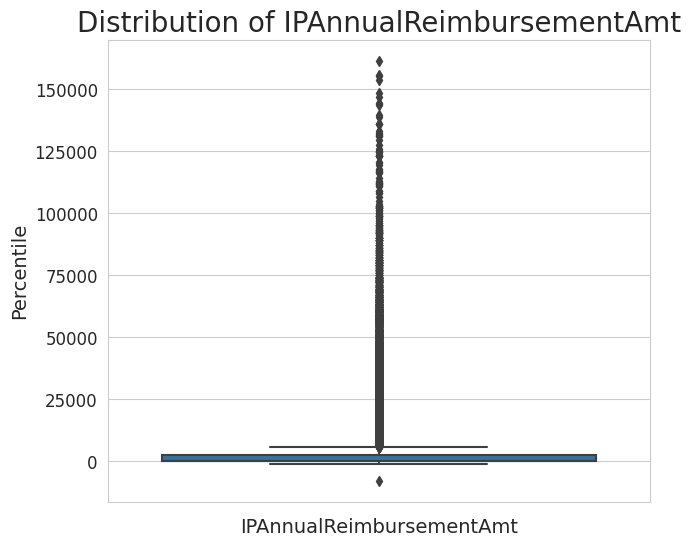

In [82]:
plt.figure(figsize=(7,6)) # hight and width of plot
sns.set_style('whitegrid') # backgroud of plot
sns.boxplot(y=train_beneficiary['IPAnnualReimbursementAmt']) # conting unique values
plt.xticks(size = 12) # size of x axis indicators(yes/no)
plt.yticks(size = 12)
plt.title('Distribution of IPAnnualReimbursementAmt', fontsize=20)
plt.xlabel('IPAnnualReimbursementAmt', size = 14)
plt.ylabel('Percentile', size = 14)
plt.show()

In [83]:
# IQR
for i in range(0,100,25):
    print('persentle {0} is {1}'.format(i,np.percentile(train_beneficiary["IPAnnualReimbursementAmt"],i)))

persentle 0 is -8000.0
persentle 25 is 0.0
persentle 50 is 0.0
persentle 75 is 2280.0


### Observations
1. diffrence between 99th percentile and 100th percentile is very big.
2. 80% of benefirary got reimbursent less then equal to 5000


##### checking of outliers  in annualReimbursement

In [84]:
for i in np.arange(99,100.1,0.1):
    print('persentle {0} is {1}'.format(i,np.percentile(np.absolute(train_beneficiary["IPAnnualReimbursementAmt"]),i)))

persentle 99.0 is 49000.0
persentle 99.1 is 51110.0
persentle 99.19999999999999 is 54000.0
persentle 99.29999999999998 is 57000.0
persentle 99.39999999999998 is 57100.0
persentle 99.49999999999997 is 59210.0
persentle 99.59999999999997 is 63000.0
persentle 99.69999999999996 is 67333.39999999735
persentle 99.79999999999995 is 74000.0
persentle 99.89999999999995 is 87000.0
persentle 99.99999999999994 is 161469.99999948748


1. AS we can see 100 percentile is double of 99.9 percentlile. from this we can conclued that it may be an outlier.

### IPAnnualDeductibleAmt

<ipython-input-85-8c9ec92b870f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_beneficiary['IPAnnualDeductibleAmt'])


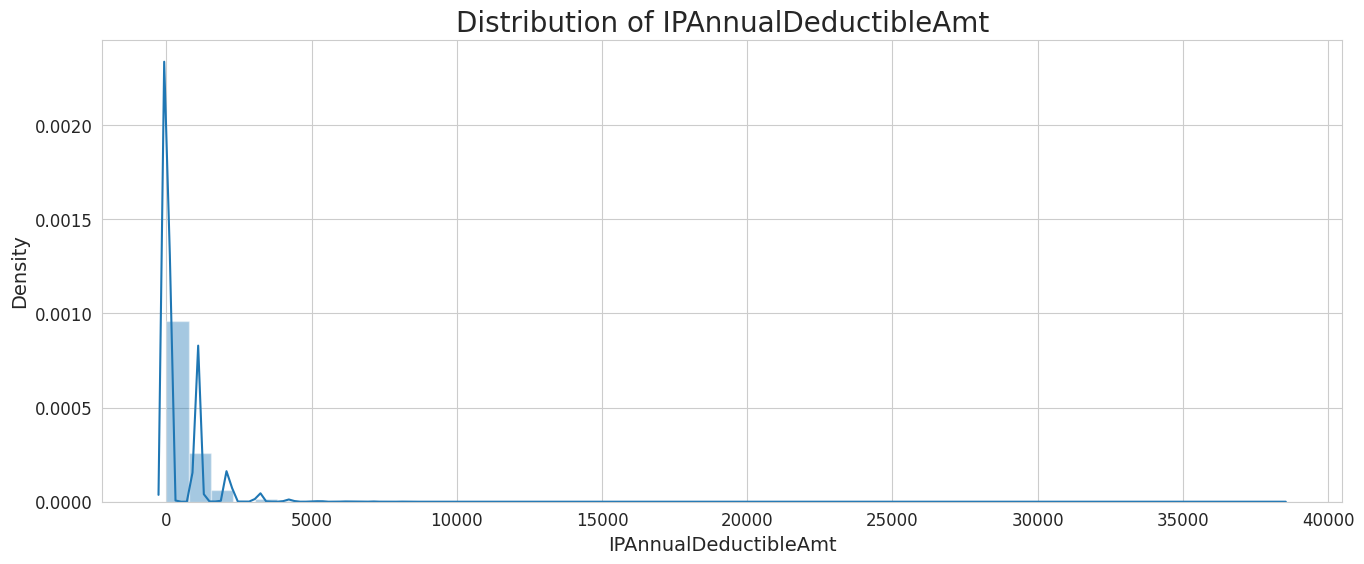

In [85]:
plt.figure(figsize=(16,6)) # hight and width of plot
sns.set_style('whitegrid') # backgroud of plot
sns.distplot(train_beneficiary['IPAnnualDeductibleAmt'])
plt.xticks(size = 12) # size of x axis indicators(yes/no)
plt.yticks(size = 12)
plt.title('Distribution of IPAnnualDeductibleAmt', fontsize=20)
plt.xlabel('IPAnnualDeductibleAmt', size = 14)
plt.ylabel('Density', size = 14)
plt.show()


### Observations
1. most of the beneficary paid less ammout to the provier
2. maximum ammout paid to the provier is 40000

In [86]:
for i in range(0,101,10):
    print('persentle {0} is {1}'.format(i,np.percentile(train_beneficiary["IPAnnualDeductibleAmt"],i),))

persentle 0 is 0.0
persentle 10 is 0.0
persentle 20 is 0.0
persentle 30 is 0.0
persentle 40 is 0.0
persentle 50 is 0.0
persentle 60 is 0.0
persentle 70 is 0.0
persentle 80 is 1068.0
persentle 90 is 1068.0
persentle 100 is 38272.0


In [87]:
for i in range(90,101,1):
    print('persentle {0} is {1}'.format(i,np.percentile(train_beneficiary["IPAnnualDeductibleAmt"],i),))

persentle 90 is 1068.0
persentle 91 is 1068.0
persentle 92 is 1068.0
persentle 93 is 1068.0
persentle 94 is 2136.0
persentle 95 is 2136.0
persentle 96 is 2136.0
persentle 97 is 2136.0
persentle 98 is 2136.0
persentle 99 is 3204.0
persentle 100 is 38272.0


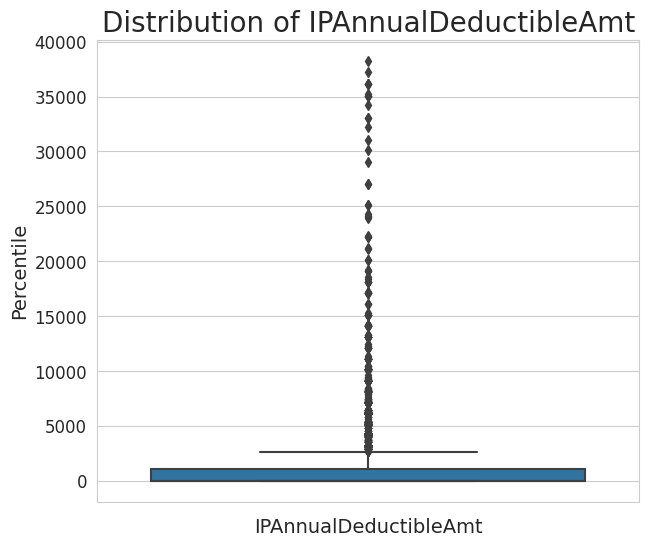

In [88]:
plt.figure(figsize=(7,6)) # hight and width of plot
sns.set_style('whitegrid') # backgroud of plot
sns.boxplot(y=train_beneficiary['IPAnnualDeductibleAmt']) # conting unique values
plt.xticks(size = 12) # size of x axis indicators(yes/no)
plt.yticks(size = 12)
plt.title('Distribution of IPAnnualDeductibleAmt', fontsize=20)
plt.xlabel('IPAnnualDeductibleAmt', size = 14)
plt.ylabel('Percentile', size = 14)
plt.show()

In [89]:
# IQR
for i in range(0,100,25):
    print('persentle {0} is {1}'.format(i,np.percentile(train_beneficiary["IPAnnualDeductibleAmt"],i),))

persentle 0 is 0.0
persentle 25 is 0.0
persentle 50 is 0.0
persentle 75 is 1068.0


##### checking for outliers

In [90]:

for i in np.arange(99,100.1,0.1):
    print('persentle {0} is {1}'.format(i,np.percentile(np.absolute(train_beneficiary["IPAnnualDeductibleAmt"]),i)))

persentle 99.0 is 3204.0
persentle 99.1 is 3204.0
persentle 99.19999999999999 is 3204.0
persentle 99.29999999999998 is 4136.0
persentle 99.39999999999998 is 4272.0
persentle 99.49999999999997 is 4272.0
persentle 99.59999999999997 is 4272.0
persentle 99.69999999999996 is 5340.0
persentle 99.79999999999995 is 6272.0
persentle 99.89999999999995 is 9068.0
persentle 99.99999999999994 is 38271.99999990675


### Observations
1. maximum amount paid to provier is 38272.0
2. 75 % or  less paid ammount less then 1068
3. we can see that 100 percentile is very large then 99.9 percentile. it may be an outlier.

### OPAnnualReimbursementAmt

<ipython-input-91-1cf67b8adedb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_beneficiary['OPAnnualReimbursementAmt']) # conting unique values


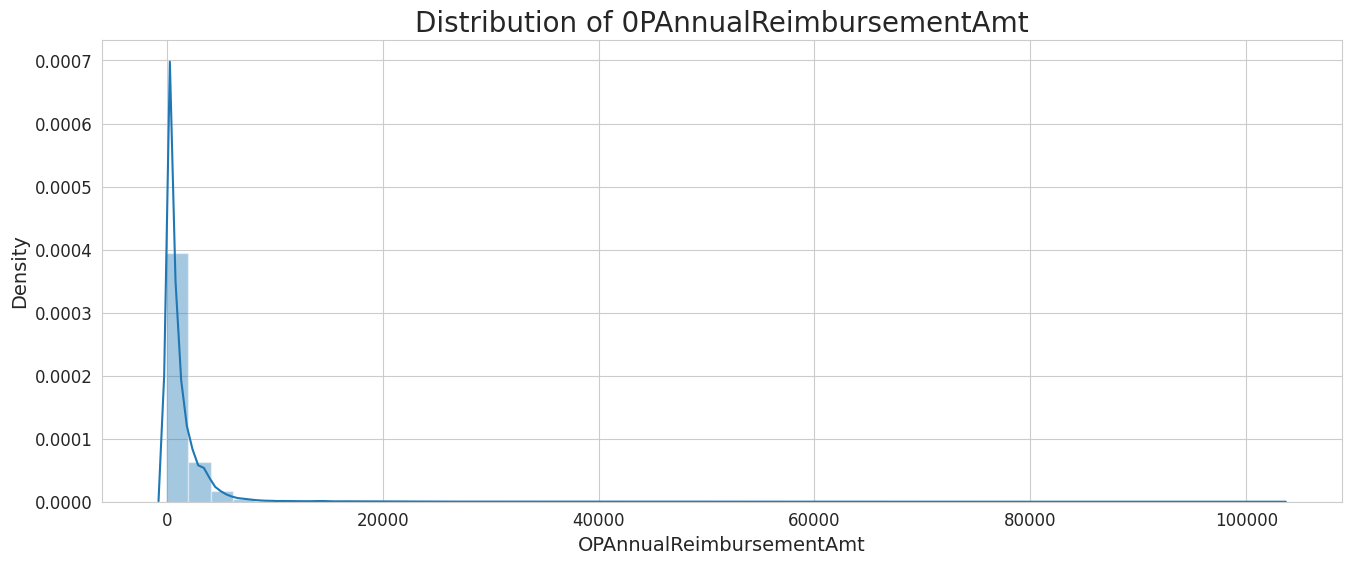

In [91]:
plt.figure(figsize=(16,6)) # hight and width of plot
sns.set_style('whitegrid') # backgroud of plot
sns.distplot(train_beneficiary['OPAnnualReimbursementAmt']) # conting unique values
plt.xticks(size = 12) # size of x axis indicators(yes/no)
plt.yticks(size = 12)
plt.title('Distribution of 0PAnnualReimbursementAmt', fontsize=20)
plt.xlabel('OPAnnualReimbursementAmt', size = 14)
plt.ylabel('Density', size = 14)
plt.show()

### Observations
1. maximum amount reimbusemented is 100000
2. most of the benefircay got reimbusment in range of 0 to 10000

In [92]:
for i in range(0,101,10):
    print('persentle {0} is {1}'.format(i,np.percentile(train_beneficiary["OPAnnualReimbursementAmt"],i),))

persentle 0 is -70.0
persentle 10 is 60.0
persentle 20 is 120.0
persentle 30 is 220.0
persentle 40 is 380.0
persentle 50 is 570.0
persentle 60 is 830.0
persentle 70 is 1230.0
persentle 80 is 1890.0
persentle 90 is 3230.0
persentle 100 is 102960.0


In [93]:
for i in range(90,101,1):
    print('persentle {0} is {1}'.format(i,np.percentile(train_beneficiary["OPAnnualReimbursementAmt"],i),))

persentle 90 is 3230.0
persentle 91 is 3380.500000000029
persentle 92 is 3560.0
persentle 93 is 3780.0
persentle 94 is 4030.0
persentle 95 is 4370.0
persentle 96 is 4850.0
persentle 97 is 5540.0
persentle 98 is 6850.0
persentle 99 is 11514.500000000116
persentle 100 is 102960.0


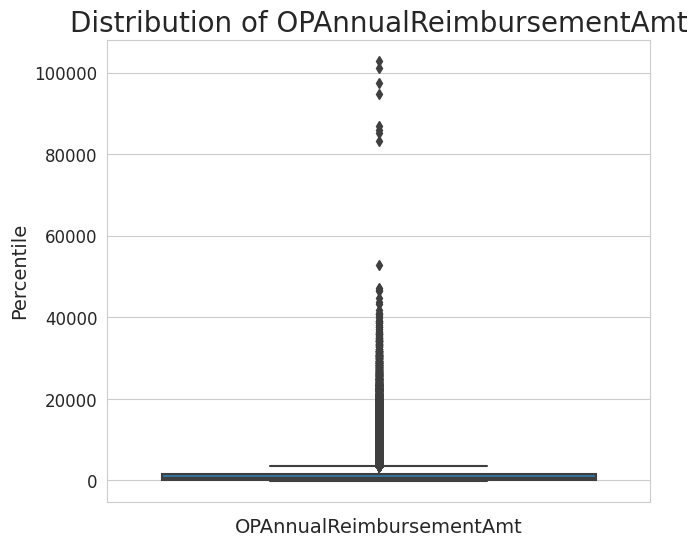

In [94]:
plt.figure(figsize=(7,6)) # hight and width of plot
sns.set_style('whitegrid') # backgroud of plot
sns.boxplot(y=train_beneficiary['OPAnnualReimbursementAmt']) # conting unique values
plt.xticks(size = 12) # size of x axis indicators(yes/no)
plt.yticks(size = 12)
plt.title('Distribution of OPAnnualReimbursementAmt', fontsize=20)
plt.xlabel('OPAnnualReimbursementAmt', size = 14)
plt.ylabel('Percentile', size = 14)
plt.show()

In [95]:
for i in range(0,101,25):
    print('persentle {0} is {1}'.format(i,np.percentile(train_beneficiary["OPAnnualReimbursementAmt"],i),))

persentle 0 is -70.0
persentle 25 is 170.0
persentle 50 is 570.0
persentle 75 is 1500.0
persentle 100 is 102960.0


In [96]:
# chekcing for outliers
for i in np.arange(99,100.1,0.1):
    print('persentle {0} is {1}'.format(i,np.percentile(np.absolute(train_beneficiary["OPAnnualReimbursementAmt"]),i)))

persentle 99.0 is 11514.500000000116
persentle 99.1 is 12680.250000000233
persentle 99.19999999999999 is 13840.0
persentle 99.29999999999998 is 14741.149999999907
persentle 99.39999999999998 is 16173.399999999092
persentle 99.49999999999997 is 17666.74999999843
persentle 99.59999999999997 is 19197.799999999406
persentle 99.69999999999996 is 21406.699999998673
persentle 99.79999999999995 is 24230.0
persentle 99.89999999999995 is 28694.449999999197
persentle 99.99999999999994 is 102959.9999998507


### Observations
1. the max reimbusement amount is 102960
2. 75 % of the beneficary got 1500 or less
3. we can see that 100 percentile is very large then 99.9 percentile. it may be an outlier.

### OPAnnualDeductibleAmt

<ipython-input-97-e1e692a3ed0b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_beneficiary['OPAnnualDeductibleAmt'])


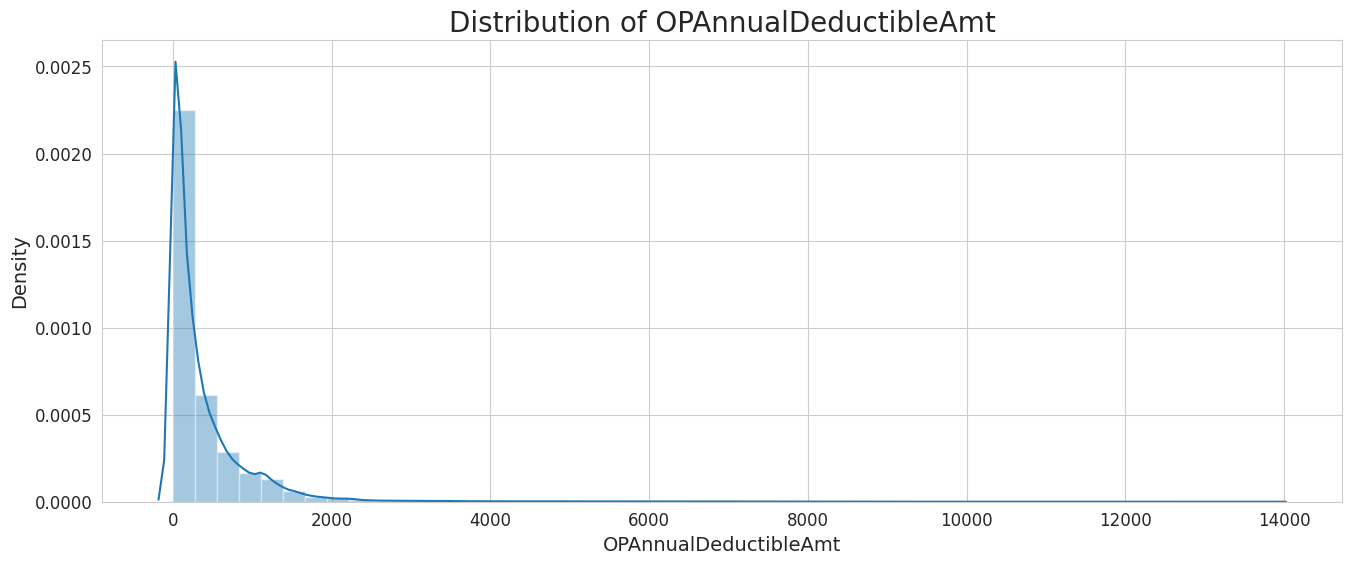

In [97]:
plt.figure(figsize=(16,6)) # hight and width of plot
sns.set_style('whitegrid') # backgroud of plot
sns.distplot(train_beneficiary['OPAnnualDeductibleAmt'])
plt.xticks(size = 12) # size of x axis indicators(yes/no)
plt.yticks(size = 12)
plt.title('Distribution of OPAnnualDeductibleAmt', fontsize=20)
plt.xlabel('OPAnnualDeductibleAmt', size = 14)
plt.ylabel('Density', size = 14)
plt.show()


### observations
1. most beneficary paid provider ammount in range of 0 to 2000
2. maximim ammount paid to hospital is 14000

In [98]:
for i in range(0,101,10):
    print('persentle {0} is {1}'.format(i,np.percentile(train_beneficiary["OPAnnualDeductibleAmt"],i),))

persentle 0 is 0.0
persentle 10 is 0.0
persentle 20 is 30.0
persentle 30 is 60.0
persentle 40 is 100.0
persentle 50 is 170.0
persentle 60 is 250.0
persentle 70 is 370.0
persentle 80 is 580.0
persentle 90 is 1000.0
persentle 100 is 13840.0


In [99]:
for i in range(90,101,1):
    print('persentle {0} is {1}'.format(i,np.percentile(train_beneficiary["OPAnnualDeductibleAmt"],i),))

persentle 90 is 1000.0
persentle 91 is 1060.0
persentle 92 is 1120.0
persentle 93 is 1180.0
persentle 94 is 1250.0
persentle 95 is 1340.0
persentle 96 is 1470.0
persentle 97 is 1650.0
persentle 98 is 1999.7999999999884
persentle 99 is 2960.0
persentle 100 is 13840.0


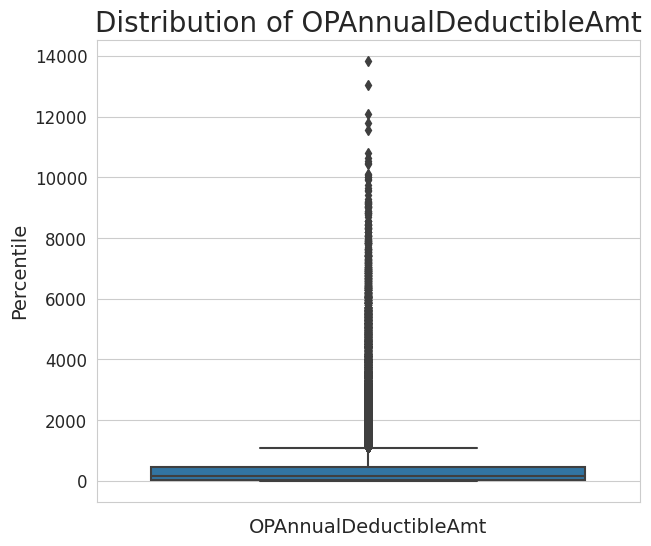

In [100]:
plt.figure(figsize=(7,6)) # hight and width of plot
sns.set_style('whitegrid') # backgroud of plot
sns.boxplot(y=train_beneficiary['OPAnnualDeductibleAmt']) # conting unique values
plt.xticks(size = 12) # size of x axis indicators(yes/no)
plt.yticks(size = 12)
plt.title('Distribution of OPAnnualDeductibleAmt', fontsize=20)
plt.xlabel('OPAnnualDeductibleAmt', size = 14)
plt.ylabel('Percentile', size = 14)
plt.show()

In [101]:
for i in range(0,101,25):
    print('persentle {0} is {1}'.format(i,np.percentile(train_beneficiary["OPAnnualDeductibleAmt"],i),))

persentle 0 is 0.0
persentle 25 is 40.0
persentle 50 is 170.0
persentle 75 is 460.0
persentle 100 is 13840.0


In [102]:
# chekcing for outliers
for i in np.arange(99,100.1,0.1):
    print('persentle {0} is {1}'.format(i,np.percentile(np.absolute(train_beneficiary["OPAnnualDeductibleAmt"]),i)))

persentle 99.0 is 2960.0
persentle 99.1 is 3180.0
persentle 99.19999999999999 is 3435.5999999999767
persentle 99.29999999999998 is 3720.0
persentle 99.39999999999998 is 4100.0
persentle 99.49999999999997 is 4502.249999999476
persentle 99.59999999999997 is 4970.0
persentle 99.69999999999996 is 5440.0
persentle 99.79999999999995 is 6070.0
persentle 99.89999999999995 is 7040.0
persentle 99.99999999999994 is 13839.99999993015


###  Observations
1. max amout paid by the beneficary is 13840
2. 75 % or less paid amount 460
3. we can see that 100 percentile is very large then 99.9 percentile. it may be an outlier.

#### checking correlation between beneficary data (person)

<ipython-input-103-a876367be4e9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = train_beneficiary.corr()


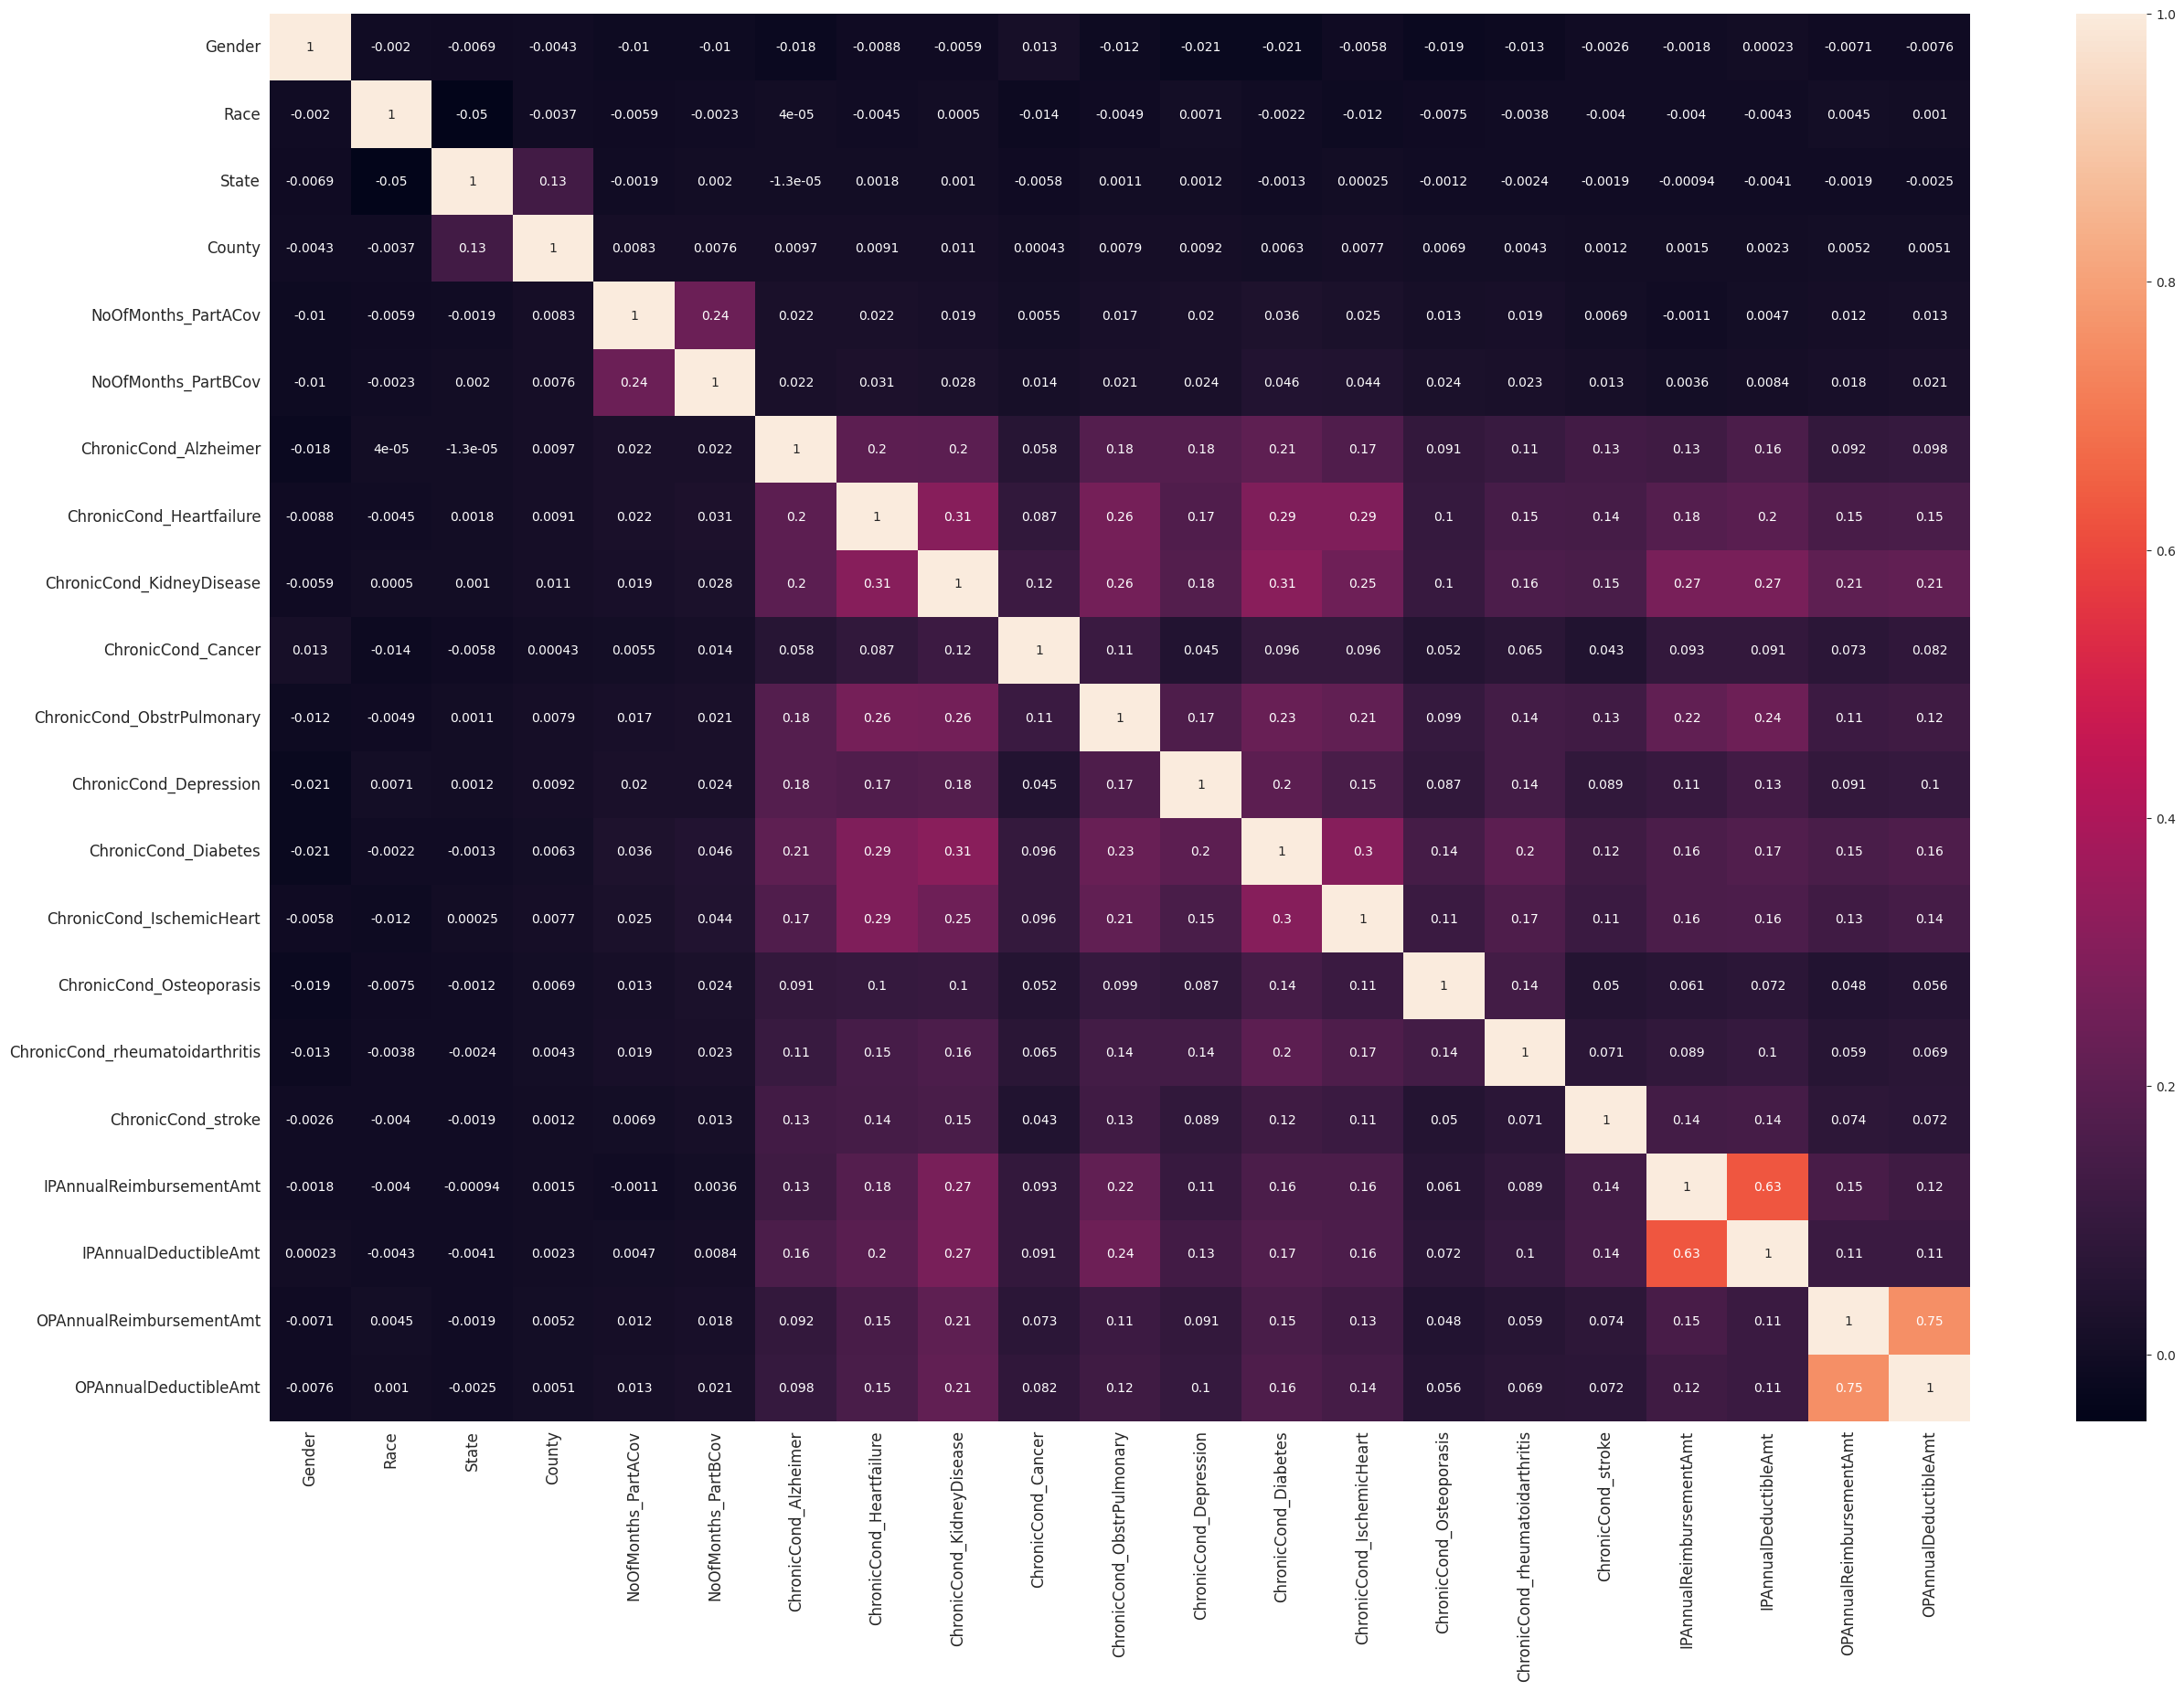

In [103]:
plt.figure(figsize=(30,20))
corrMatrix = train_beneficiary.corr()
hm = sns.heatmap(corrMatrix, annot = True)
plt.xticks(size = 12) # size of x axis indicators(yes/no)
plt.yticks(size = 12)
plt.show()

#### checking correlation between beneficary data (spearman)

<ipython-input-104-991d9ade0e3d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = train_beneficiary.corr(method='spearman')


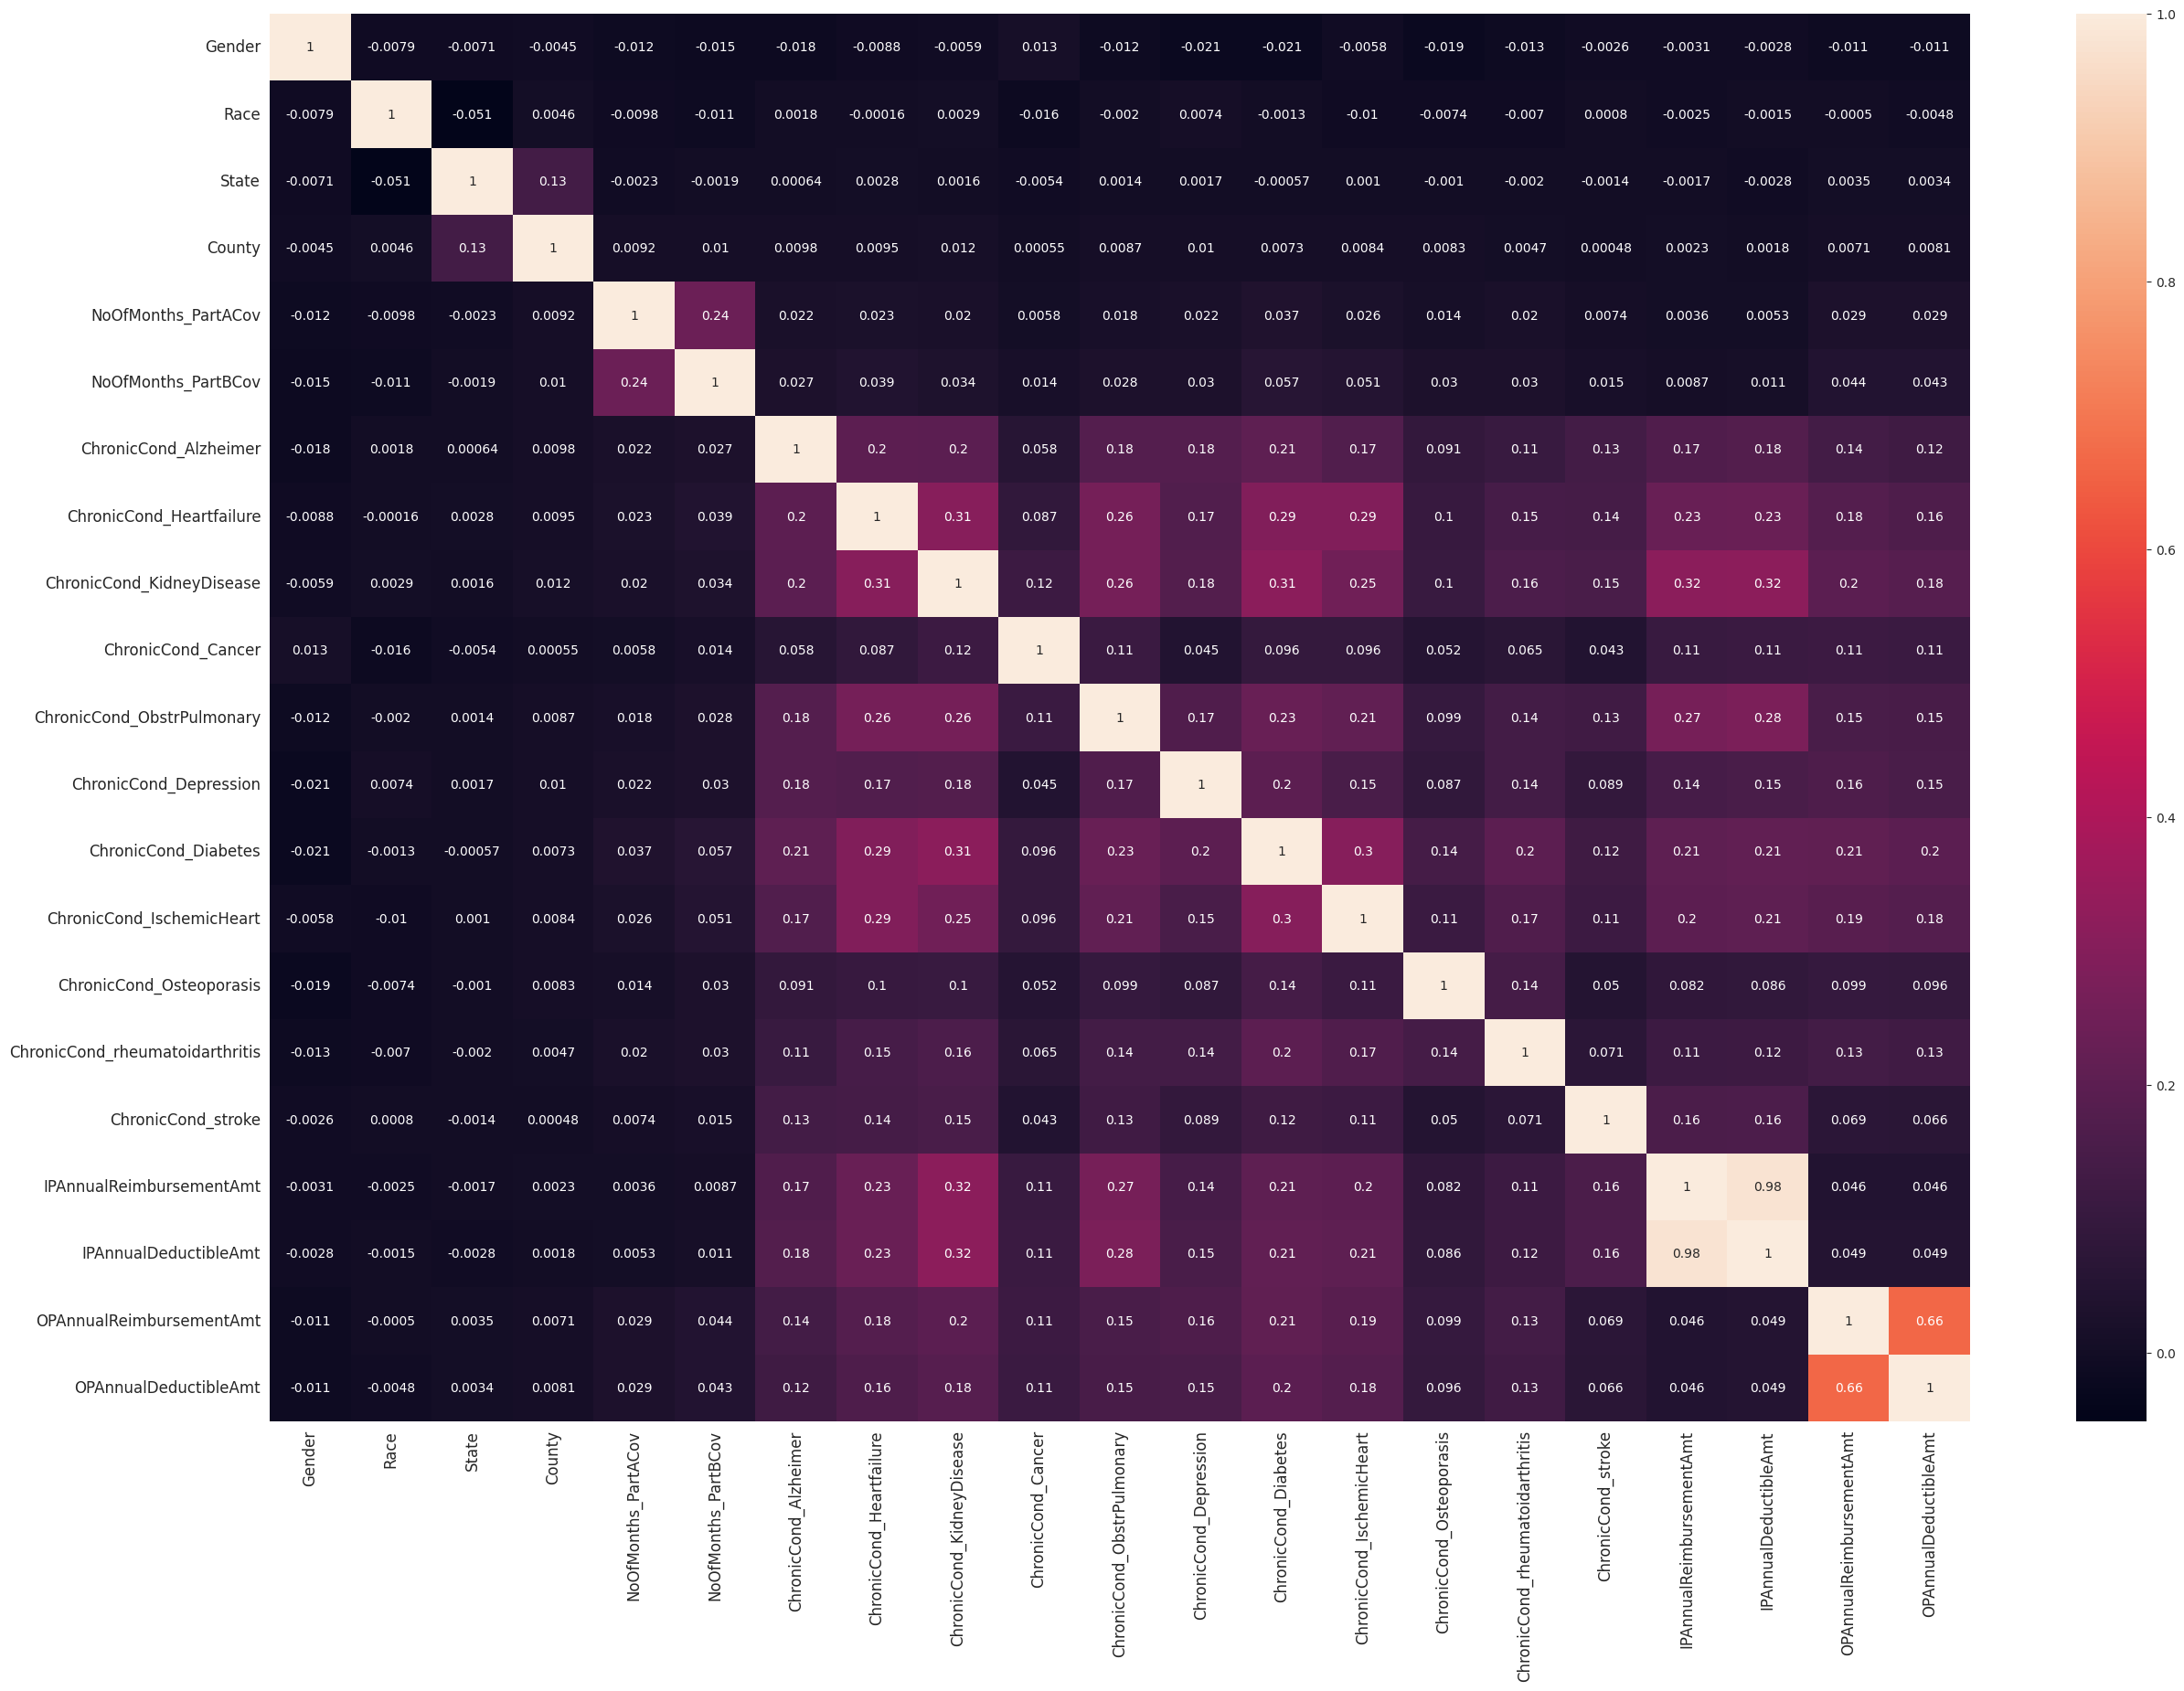

In [104]:
plt.figure(figsize=(30,20))
corrMatrix = train_beneficiary.corr(method='spearman')
hm = sns.heatmap(corrMatrix, annot = True)
plt.xticks(size = 12) # size of x axis indicators(yes/no)
plt.yticks(size = 12)
plt.show()

### observations

1. IPAnnualDeductibleAmt is very collinear  with IPAnnualReimbursementAmt with 0.97
2. OPAnnualReimbursementAmt is collinear with OPAnnualDeductibleAmt with 0.66

we can remove one of the feature IPAnnualDeductibleAmt or IPAnnualReimbursementAmt

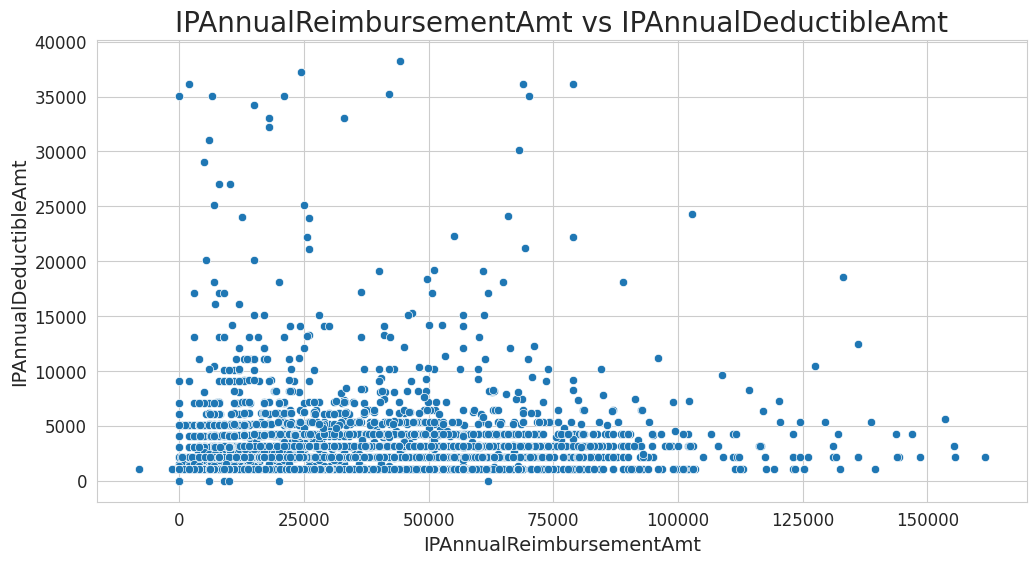

In [105]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='IPAnnualReimbursementAmt',y='IPAnnualDeductibleAmt',data=train_beneficiary)
plt.xticks(size = 12) # size of x axis indicators(yes/no)
plt.yticks(size = 12)
plt.title('IPAnnualReimbursementAmt vs IPAnnualDeductibleAmt', fontsize=20)
plt.xlabel('IPAnnualReimbursementAmt', size = 14)
plt.ylabel('IPAnnualDeductibleAmt', size = 14)
plt.show()


## Outpaitent data

In [106]:
train_outpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [107]:
train_outpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDiagnosisCode_6  

#### InscClaimAmtReimbursed

In [108]:
train_outpatient['InscClaimAmtReimbursed'].isnull().any()

False

<ipython-input-109-9f0b90d4c2bf>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_outpatient['InscClaimAmtReimbursed'])


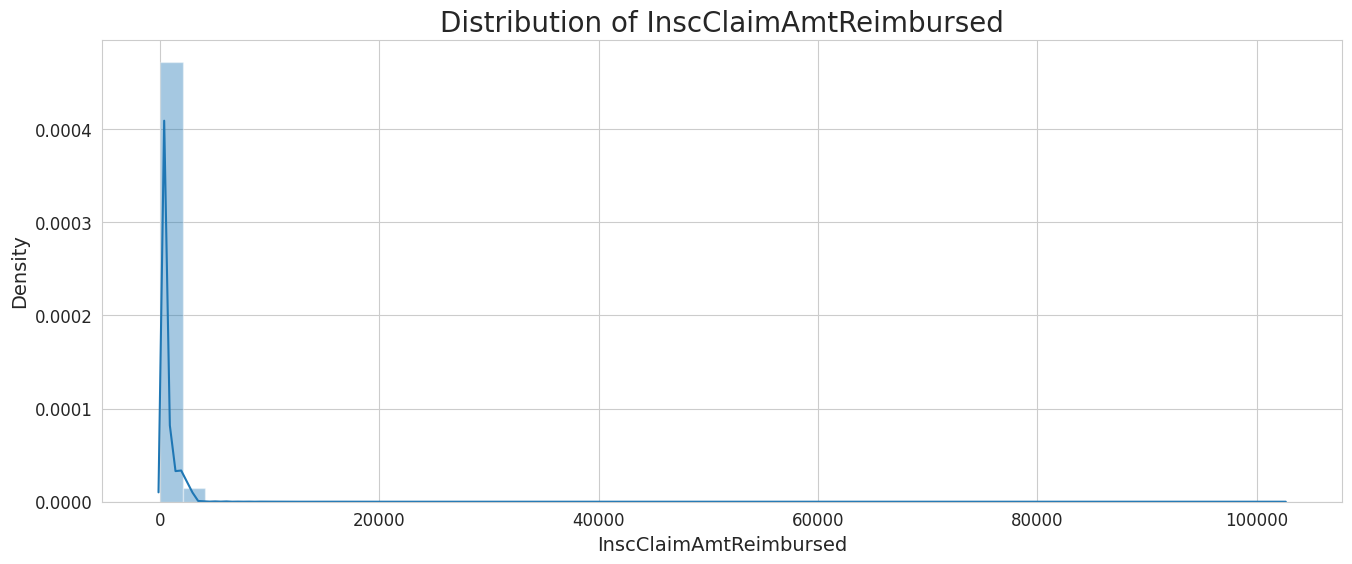

In [109]:
plt.figure(figsize=(16,6)) # hight and width of plot
sns.set_style('whitegrid') # backgroud of plot
sns.distplot(train_outpatient['InscClaimAmtReimbursed'])
plt.xticks(size = 12) # size of x axis indicators(yes/no)
plt.yticks(size = 12)
plt.title('Distribution of InscClaimAmtReimbursed', fontsize=20)
plt.xlabel('InscClaimAmtReimbursed', size = 14)
plt.ylabel('Density', size = 14)
plt.show()


In [110]:
for i in range(0,101,25):
    print('persentle {0} is {1}'.format(i,np.percentile(train_outpatient["InscClaimAmtReimbursed"],i),))

persentle 0 is 0.0
persentle 25 is 40.0
persentle 50 is 80.0
persentle 75 is 200.0
persentle 100 is 102500.0


In [111]:
for i in range(0,101,10):
    print('persentle {0} is {1}'.format(i,np.percentile(train_outpatient["InscClaimAmtReimbursed"],i),))

persentle 0 is 0.0
persentle 10 is 10.0
persentle 20 is 30.0
persentle 30 is 40.0
persentle 40 is 60.0
persentle 50 is 80.0
persentle 60 is 100.0
persentle 70 is 200.0
persentle 80 is 300.0
persentle 90 is 700.0
persentle 100 is 102500.0


In [112]:
for i in range(90,101,1):
    print('persentle {0} is {1}'.format(i,np.percentile(train_outpatient["InscClaimAmtReimbursed"],i),))

persentle 90 is 700.0
persentle 91 is 800.0
persentle 92 is 900.0
persentle 93 is 1000.0
persentle 94 is 1200.0
persentle 95 is 1500.0
persentle 96 is 1800.0
persentle 97 is 2100.0
persentle 98 is 2500.0
persentle 99 is 3300.0
persentle 100 is 102500.0


In [113]:
for i in np.arange(99,100.1,0.1):
    print('persentle {0} is {1}'.format(i,np.percentile(np.absolute(train_outpatient["InscClaimAmtReimbursed"]),i)))

persentle 99.0 is 3300.0
persentle 99.1 is 3300.0
persentle 99.19999999999999 is 3300.0
persentle 99.29999999999998 is 3300.0
persentle 99.39999999999998 is 3300.0
persentle 99.49999999999997 is 3300.0
persentle 99.59999999999997 is 3300.0
persentle 99.69999999999996 is 3300.0
persentle 99.79999999999995 is 3300.0
persentle 99.89999999999995 is 3500.0
persentle 99.99999999999994 is 102499.9999996362


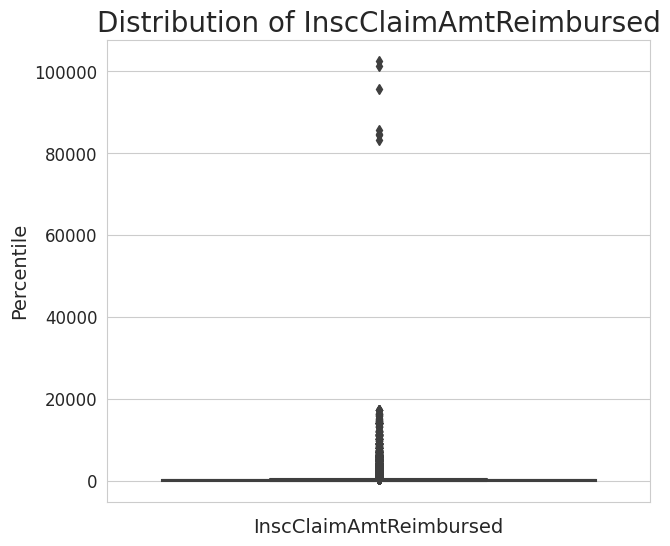

In [114]:
plt.figure(figsize=(7,6)) # hight and width of plot
sns.set_style('whitegrid') # backgroud of plot
sns.boxplot(y=train_outpatient['InscClaimAmtReimbursed']) # conting unique values
plt.xticks(size = 12) # size of x axis indicators(yes/no)
plt.yticks(size = 12)
plt.title('Distribution of InscClaimAmtReimbursed', fontsize=20)
plt.xlabel('InscClaimAmtReimbursed', size = 14)
plt.ylabel('Percentile', size = 14)
plt.show()

### Observations
1. max amount filed for reimbusement is 102500
1. 75 % of claim field for amount 200
3. There may be some outliers in our data.

### Attending physican

In [115]:
# There are some data poins which are na becasue of that they are not attended by physicain or some hunam error.

train_outpatient['AttendingPhysician'].isnull().any()
train_outpatient['AttendingPhysician']=train_outpatient['AttendingPhysician'].fillna(0)
train_outpatient['AttendingPhysician'].isnull().any()
# filling nan values in test data
test_outpatient['AttendingPhysician']=test_outpatient['AttendingPhysician'].fillna(0)

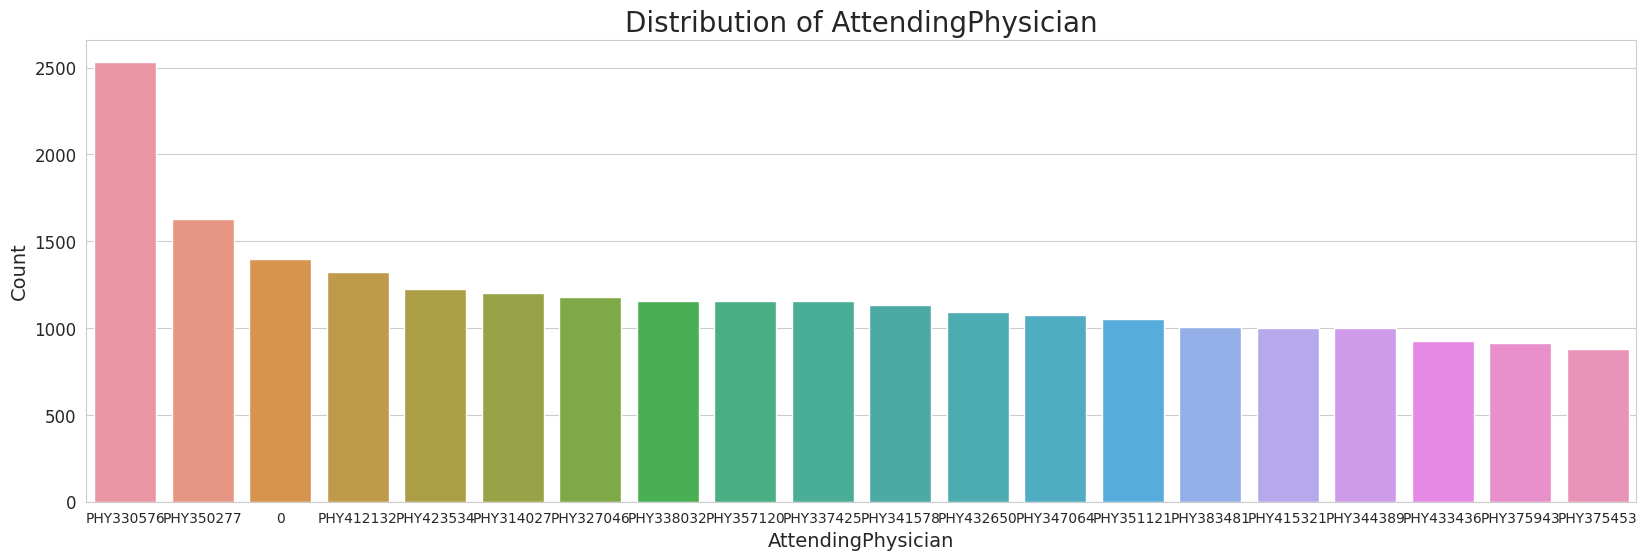

In [116]:
# county distribution
plt.figure(figsize=(20,6)) # hight and width of plot
sns.set_style('whitegrid') # backgroud of plot
sns.countplot(data=train_outpatient,x='AttendingPhysician',order=train_outpatient['AttendingPhysician'].value_counts()[:20].index) # name of the category(index)
plt.xticks(size = 10) # size of x axis indicators(yes/no)
plt.yticks(size = 12)
plt.title('Distribution of AttendingPhysician', fontsize=20)
plt.xlabel('AttendingPhysician', size = 14)
plt.ylabel('Count', size = 14)
plt.show()

In [117]:
train_outpatient['AttendingPhysician'].value_counts()[:20].index

Index(['PHY330576', 'PHY350277',           0, 'PHY412132', 'PHY423534',
       'PHY314027', 'PHY327046', 'PHY338032', 'PHY357120', 'PHY337425',
       'PHY341578', 'PHY432650', 'PHY347064', 'PHY351121', 'PHY383481',
       'PHY415321', 'PHY344389', 'PHY433436', 'PHY375943', 'PHY375453'],
      dtype='object')

### Operating physician

In [118]:
# checking nan values
# filling them with zero
train_outpatient['OperatingPhysician'].isnull().any()
train_outpatient['OperatingPhysician']=train_outpatient['OperatingPhysician'].fillna(0)
train_outpatient['OperatingPhysician'].isnull().any()
# removing na from test data
test_outpatient['OperatingPhysician']=test_outpatient['OperatingPhysician'].fillna(0)

In [119]:
#counting the physican code
operating_phy=train_outpatient['OperatingPhysician'].value_counts()[1:21]


In [120]:

# county distribution
plt.figure(figsize=(20,6)) # hight and width of plot
sns.set_style('whitegrid') # backgroud of plot
sns.barplot(operating_phy.index,operating_phy.values,order=operating_phy.index) # name of the category(index)
plt.xticks(size = 10) # size of x axis indicators(yes/no)
plt.yticks(size = 12)
plt.title('Distribution of OperatingPhysician', fontsize=20)
plt.xlabel('OperatingPhysician', size = 14)
plt.ylabel('Count', size = 14)
plt.show()

TypeError: ignored

<Figure size 2000x600 with 0 Axes>

In [ ]:
train_outpatient['OperatingPhysician'].value_counts()[:10]

### Observation
1. There are more then 400000 patients who were not attented by the  any of the operating physican.

### Other physician

In [ ]:
# checking nan values
# filling them with zero
train_outpatient['OtherPhysician'].isnull().any()
train_outpatient['OtherPhysician']=train_outpatient['OtherPhysician'].fillna(0)
# remvoing nan with 0 in test otherphysican
test_outpatient['OtherPhysician']=test_outpatient['OtherPhysician'].fillna(0)

In [ ]:
test_outpatient['OtherPhysician'].value_counts()

### claim diagnose code

In [ ]:
len(train_outpatient['ClmDiagnosisCode_1'].unique())
# there are 10355 unique claimDaignosiscode

In [ ]:
## replacing nan values with zero
train_outpatient['ClmDiagnosisCode_1'].isnull().any()
train_outpatient['ClmDiagnosisCode_1']=train_outpatient['ClmDiagnosisCode_1'].fillna(0)
train_outpatient['ClmDiagnosisCode_2']=train_outpatient['ClmDiagnosisCode_2'].fillna(0)
train_outpatient['ClmDiagnosisCode_3']=train_outpatient['ClmDiagnosisCode_3'].fillna(0)
train_outpatient['ClmDiagnosisCode_4']=train_outpatient['ClmDiagnosisCode_4'].fillna(0)
train_outpatient['ClmDiagnosisCode_5']=train_outpatient['ClmDiagnosisCode_5'].fillna(0)
train_outpatient['ClmDiagnosisCode_6']=train_outpatient['ClmDiagnosisCode_6'].fillna(0)
train_outpatient['ClmDiagnosisCode_7']=train_outpatient['ClmDiagnosisCode_7'].fillna(0)
train_outpatient['ClmDiagnosisCode_8']=train_outpatient['ClmDiagnosisCode_8'].fillna(0)
train_outpatient['ClmDiagnosisCode_9']=train_outpatient['ClmDiagnosisCode_9'].fillna(0)
train_outpatient['ClmDiagnosisCode_10']=train_outpatient['ClmDiagnosisCode_10'].fillna(0)
train_outpatient['ClmDiagnosisCode_1'].isnull().any()
# replacing nan valuse in test data
test_outpatient['ClmDiagnosisCode_1']=test_outpatient['ClmDiagnosisCode_1'].fillna(0)
test_outpatient['ClmDiagnosisCode_2']=test_outpatient['ClmDiagnosisCode_2'].fillna(0)
test_outpatient['ClmDiagnosisCode_3']=test_outpatient['ClmDiagnosisCode_3'].fillna(0)
test_outpatient['ClmDiagnosisCode_4']=test_outpatient['ClmDiagnosisCode_4'].fillna(0)
test_outpatient['ClmDiagnosisCode_5']=test_outpatient['ClmDiagnosisCode_5'].fillna(0)
test_outpatient['ClmDiagnosisCode_6']=test_outpatient['ClmDiagnosisCode_6'].fillna(0)
test_outpatient['ClmDiagnosisCode_7']=test_outpatient['ClmDiagnosisCode_7'].fillna(0)
test_outpatient['ClmDiagnosisCode_8']=test_outpatient['ClmDiagnosisCode_8'].fillna(0)
test_outpatient['ClmDiagnosisCode_9']=test_outpatient['ClmDiagnosisCode_9'].fillna(0)
test_outpatient['ClmDiagnosisCode_10']=test_outpatient['ClmDiagnosisCode_10'].fillna(0)

### claim procedure code

In [ ]:
train_outpatient['ClmProcedureCode_1'].isnull().any()
## remving nan valeus form the claimprocedure
train_outpatient['ClmProcedureCode_1']=train_outpatient['ClmProcedureCode_1'].fillna(0)
train_outpatient['ClmProcedureCode_2']=train_outpatient['ClmProcedureCode_2'].fillna(0)
train_outpatient['ClmProcedureCode_3']=train_outpatient['ClmProcedureCode_3'].fillna(0)
train_outpatient['ClmProcedureCode_4']=train_outpatient['ClmProcedureCode_4'].fillna(0)
train_outpatient['ClmProcedureCode_5']=train_outpatient['ClmProcedureCode_5'].fillna(0)
train_outpatient['ClmProcedureCode_6']=train_outpatient['ClmProcedureCode_6'].fillna(0)
## removing nan values from test data
test_outpatient['ClmProcedureCode_1']=test_outpatient['ClmProcedureCode_1'].fillna(0)
test_outpatient['ClmProcedureCode_2']=test_outpatient['ClmProcedureCode_2'].fillna(0)
test_outpatient['ClmProcedureCode_3']=test_outpatient['ClmProcedureCode_3'].fillna(0)
test_outpatient['ClmProcedureCode_4']=test_outpatient['ClmProcedureCode_4'].fillna(0)
test_outpatient['ClmProcedureCode_5']=test_outpatient['ClmProcedureCode_5'].fillna(0)
test_outpatient['ClmProcedureCode_6']=test_outpatient['ClmProcedureCode_6'].fillna(0)

### DeductibleAmtPaid

In [ ]:

train_outpatient['DeductibleAmtPaid'].isnull().any()

In [ ]:
plt.figure(figsize=(16,6)) # hight and width of plot
sns.set_style('whitegrid') # backgroud of plot
sns.distplot(train_outpatient['DeductibleAmtPaid'])
plt.xticks(size = 12) # size of x axis indicators(yes/no)
plt.yticks(size = 12)
plt.title('Distribution of DeductibleAmtPaid', fontsize=20)
plt.xlabel('DeductibleAmtPaid', size = 14)
plt.ylabel('Density', size = 14)
plt.show()


In [ ]:
for i in range(0,101,25):
    print('persentle {0} is {1}'.format(i,np.percentile(train_outpatient["DeductibleAmtPaid"],i),))

In [ ]:
for i in range(90,101,1):
    print('persentle {0} is {1}'.format(i,np.percentile(train_outpatient["DeductibleAmtPaid"],i),))

In [ ]:
for i in np.arange(99,100.1,0.1):
    print('persentle {0} is {1}'.format(i,np.percentile(np.absolute(train_outpatient["DeductibleAmtPaid"]),i)))

In [ ]:
plt.figure(figsize=(7,6)) # hight and width of plot
sns.set_style('whitegrid') # backgroud of plot
sns.boxplot(y=train_outpatient['DeductibleAmtPaid']) # conting unique values
plt.xticks(size = 12) # size of x axis indicators(yes/no)
plt.yticks(size = 12)
plt.title('Distribution of DeductibleAmtPaid', fontsize=20)
plt.xlabel('DeductibleAmtPaid', size = 14)
plt.ylabel('Percentile', size = 14)
plt.show()

### Observations
1. maximum deductiableamtpaid is 897
2. 75% of patients paid zero(0) deductible amount.
3. There are some outliers in DeductibleAmtPaid

### claim admit diagnose code

In [ ]:
train_outpatient['ClmAdmitDiagnosisCode'].isnull().any()
# repaling nan values with 0.
train_outpatient['ClmAdmitDiagnosisCode']=train_outpatient['ClmAdmitDiagnosisCode'].fillna(0)
# removing from test data
test_outpatient['ClmAdmitDiagnosisCode']=test_outpatient['ClmAdmitDiagnosisCode'].fillna(0)

In [ ]:
## top 20 clmAdmitDiagnosisicode
train_outpatient['ClmAdmitDiagnosisCode'].value_counts()[:20].index

In [ ]:
train_outpatient.isna().sum()

In [ ]:
#https://datatofish.com/correlation-matrix-pandas/#:~:text=Steps%20to%20Create%20a%20Correlation%20Matrix%20using%20Pandas,above%20dataset%20in%20Python%3A%20import...%20Step%203%3A%20
plt.figure(figsize=(15,8))
corrMatrix = train_outpatient.corr()
hm = sns.heatmap(corrMatrix, annot = True)
plt.xticks(size = 12) # size of x axis indicators(yes/no)
plt.yticks(size = 12)
plt.show()

### Observations
1. There are lots of collinear featues if outpatient data

  a) InscClaimAmtReimbursed with ClmProcedureCode_4

  b) ClmProcedureCode_4 with ClmProcedureCode_2

we could remove clmProcedureCode_4 in final data

### INPatient data
All the fearues are common to outpaitinet data except 3 columns

In [ ]:
for i in train_inpatient.columns:
    if i not in train_outpatient.columns:
        print(i)

### DiagnosisGroupCode

In [ ]:
train_inpatient.DiagnosisGroupCode.isnull().any()

In [ ]:
dig_count=train_inpatient['DiagnosisGroupCode'].value_counts()[:30]


In [ ]:
# county distribution
plt.figure(figsize=(20,6)) # hight and width of plot
sns.set_style('whitegrid') # backgroud of plot
sns.barplot(dig_count.index,dig_count.values,order=dig_count.index) # name of the category(index)
# plt.xticks(size = 10) # size of x axis indicators(yes/no)
# plt.yticks(size = 12)
# plt.title('Distribution of DiagnosisGroupCode', fontsize=20)
# plt.xlabel('DiagnosisGroupCode', size = 14)
# plt.ylabel('Count', size = 14)
# plt.show()

### observations  
1. patinet admitted in the hospital maximum of them are diagonsed with 882.
2. all code have same frequency in the data.

### Creating New Featues from data.(Features Engineering)

#### 1. Beneficary data.

In [ ]:
train_beneficiary.columns

we have almost all values in DOD(date of death) is NaN by this we can add another column weather a dead or not.
if value is Nan this means he is alive(0) or has a date means he is dead(1).

#### Dead_or_Alive

In [ ]:
#https://www.kaggle.com/rahuly93/medicare-provider-fraud-detection


train_beneficiary.loc[train_beneficiary.DOD.isna(),'Dead_or_Alive']=0
train_beneficiary.loc[train_beneficiary.DOD.notna(),'Dead_or_Alive']=1
# test data

test_beneficiary.loc[test_beneficiary.DOD.isna(),"Dead_or_Alive"]=0
test_beneficiary.loc[test_beneficiary.DOD.notna(),"Dead_or_Alive"]=1


##### Age

we will calculate age from the latest date present in our data.

In [ ]:
train_beneficiary.DOD.unique()

In [ ]:
#https://datatofish.com/strings-to-datetime-pandas/
train_beneficiary['DOB']=pd.to_datetime(train_beneficiary['DOB'],format='%Y-%m-%d')
train_beneficiary['DOD']=pd.to_datetime(train_beneficiary['DOD'],format='%Y-%m-%d')
# test
test_beneficiary['DOD']=pd.to_datetime(test_beneficiary['DOD'],format='%Y-%m-%d')
test_beneficiary['DOB']=pd.to_datetime(test_beneficiary['DOB'],format='%Y-%m-%d')

# subracting dod form dob to get the age accoring to it.
train_beneficiary['Age']= round((train_beneficiary['DOD']-train_beneficiary['DOB']).dt.days/365)
#testB
test_beneficiary['Age']=round((test_beneficiary['DOD']-test_beneficiary['DOB']).dt.days/365)


In [ ]:
train_beneficiary.Age.unique()
test_beneficiary.Age.unique()

In [ ]:
# fill the nan vlaues accorindig to the latest date presnt in DoD.
train_beneficiary['Age']=train_beneficiary['Age'].fillna(round((pd.to_datetime('2009-12-01',format='%Y-%m-%d')-train_beneficiary['DOB']).dt.days/365))

# test
test_beneficiary['Age']=test_beneficiary['Age'].fillna(round((pd.to_datetime('2009-12-01',format='%Y-%m-%d')-test_beneficiary['DOB']).dt.days/365))
# cheking
train_beneficiary['Age'].isna().any()
test_beneficiary['Age'].isna().any()

In [ ]:
age_count=train_beneficiary.Age.value_counts()
plt.figure(figsize=(30,6)) # hight and width of plot
sns.set_style('whitegrid') # backgroud of plot
sns.barplot(age_count.index,age_count.values,order=age_count.index) # name of the category(index)
plt.xticks(size = 10) # size of x axis indicators(yes/no)
plt.yticks(size = 12)
plt.title('Distribution of Age', fontsize=20)
plt.xlabel('Age', size = 14)
plt.ylabel('Count', size = 14)
plt.show()

###  Observations
1. maximum patinet belongs to age group of 80 to 50
2. very few paitnets belongs to age group of 30 or less.

##### Total_chornic_condition.

1. we have 10 diffrent chornic conditions for a paitent we can sum all these chronic conditions to get how many chornic disease have a single paitent

In [ ]:
train_beneficiary['Tolat_chronic_cond']=  (train_beneficiary['ChronicCond_Alzheimer'] + train_beneficiary['ChronicCond_Cancer'] +
                                          train_beneficiary['ChronicCond_Depression'] + train_beneficiary['ChronicCond_Diabetes'] +
                                          train_beneficiary['ChronicCond_Heartfailure'] + train_beneficiary['ChronicCond_IschemicHeart'] +
                                          train_beneficiary['ChronicCond_KidneyDisease'] + train_beneficiary['ChronicCond_ObstrPulmonary'] +
                                           train_beneficiary['ChronicCond_rheumatoidarthritis'] + train_beneficiary['ChronicCond_stroke']
                                          )
# test
test_beneficiary['Tolat_chronic_cond']=  (test_beneficiary['ChronicCond_Alzheimer'] + test_beneficiary['ChronicCond_Cancer'] +
                                          test_beneficiary['ChronicCond_Depression'] + test_beneficiary['ChronicCond_Diabetes'] +
                                          test_beneficiary['ChronicCond_Heartfailure'] + test_beneficiary['ChronicCond_IschemicHeart'] +
                                          test_beneficiary['ChronicCond_KidneyDisease'] + test_beneficiary['ChronicCond_ObstrPulmonary'] +
                                           test_beneficiary['ChronicCond_rheumatoidarthritis'] + test_beneficiary['ChronicCond_stroke']
                                          )

In [ ]:
plt.figure(figsize=(12,6)) # hight and width of plot
sns.set_style('whitegrid') # backgroud of plot
sns.countplot(data=train_beneficiary,x='Tolat_chronic_cond') # conting unique values
plt.xticks(size = 12) # size of x axis indicators(yes/no)
plt.yticks(size = 12)
plt.title('Distribution of total_chornic_cond', fontsize=20)
plt.xlabel('tolal_chronic_condi', size = 14)
plt.ylabel('Density', size = 14)
plt.show()

### Observations
1. most of patients have 1-6 chronic disease
2. very few of them have all 10 chronic disease.

#### cheking collinearity with new featues

In [ ]:
plt.figure(figsize=(30,20))
corrMatrix = train_beneficiary.corr(method='spearman')
hm = sns.heatmap(corrMatrix, annot = True)
plt.xticks(size = 12) # size of x axis indicators(yes/no)
plt.yticks(size = 12)
plt.show()

### Observations
1. new featues are not highly colliner with other featues

### INPatient data

In [ ]:
train_inpatient.columns

##### Admitted_or_Not

Adding a new column for weather a patient is admitted or not  for inpaitent data we will indicate it with 1.

In [ ]:
#Traindata
train_inpatient['Admitted_or_Not']=1
# test_data
test_inpatient['Admitted_or_Not']=1

### Outpatient

In [ ]:
train_outpatient.columns

##### Admitted_or_Not

Adding a new column for weather a patient is admitted or not  for outpatient data we will indicate it with 0.

In [ ]:
#Traindata
train_outpatient['Admitted_or_Not']=0
# test_data
test_outpatient['Admitted_or_Not']=0

## Merging data

1. first we merge inpatient data and outpatient by common columns present in both the data frame.
2. second we  merge the merged data set in first step with beneficiary data by BeneId (Beneficiary id).
3. Third we merge the train lables will above merged data set by Provider id.


### 1. Merging Inpatient and Outpatient data

In [ ]:
print(train_inpatient.shape,train_outpatient.shape)

In [ ]:
# getting commonn columns
comm_col=[]
for i in train_inpatient.columns:
    if i in train_outpatient.columns:
        comm_col.append(i)
        print(i)
len(comm_col)

In [ ]:
IN_OUT_train=pd.merge(train_inpatient,train_outpatient,left_on=comm_col,right_on=comm_col,how='outer')
IN_OUT_test=pd.merge(test_inpatient,test_outpatient,left_on=comm_col,right_on=comm_col,how='outer')
IN_OUT_train.columns
IN_OUT_test.columns

###### Admitted_days

we will get admitted_days by subtraching DiscargeDt to AdmissinonDt.

In [ ]:
IN_OUT_train['AdmissionDt'].isna().any()
# IN_OUT_train['DischargeDt'].isna().sum()

In [ ]:
IN_OUT_train['AdmissionDt']=pd.to_datetime(IN_OUT_train['AdmissionDt'],format='%Y-%m-%d')
IN_OUT_train['DischargeDt']=pd.to_datetime(IN_OUT_train['DischargeDt'],format='%Y-%m-%d')
#test
IN_OUT_test['AdmissionDt']=pd.to_datetime(IN_OUT_test['AdmissionDt'],format='%Y-%m-%d')
IN_OUT_test['DischargeDt']=pd.to_datetime(IN_OUT_test['DischargeDt'],format='%Y-%m-%d')

IN_OUT_train['Admitted_days']=round((IN_OUT_train['DischargeDt']-IN_OUT_train['AdmissionDt']).dt.days)
#test
IN_OUT_test['Admitted_days']=round((IN_OUT_test['DischargeDt']-IN_OUT_test['AdmissionDt']).dt.days)

In [ ]:
#filling nan values with 1 because patient is admitted for mininmun day is 1.
IN_OUT_train['Admitted_days']=IN_OUT_train['Admitted_days'].fillna(1)
IN_OUT_test['Admitted_days']=IN_OUT_test['Admitted_days'].fillna(1)
IN_OUT_train['Admitted_days'].isna().any()

##### Claim_time

we will caluculate claim_time by subtracting claim_start_date by claim_end_date.

In [ ]:
IN_OUT_train['ClaimStartDt'].isna().any()
IN_OUT_train['ClaimEndDt'].isna().any()

In [ ]:
IN_OUT_train['ClaimStartDt']=pd.to_datetime(IN_OUT_train['ClaimStartDt'],format='%Y-%m-%d')
IN_OUT_train['ClaimEndDt']=pd.to_datetime(IN_OUT_train['ClaimEndDt'],format='%Y-%m-%d')
#test
IN_OUT_test['ClaimStartDt']=pd.to_datetime(IN_OUT_test['ClaimStartDt'],format='%Y-%m-%d')
IN_OUT_test['ClaimEndDt']=pd.to_datetime(IN_OUT_test['ClaimEndDt'],format='%Y-%m-%d')

IN_OUT_train['Claim_time']=round((IN_OUT_train['ClaimEndDt']-IN_OUT_train['ClaimStartDt']).dt.days)+1 # adding one becase atleast 1 day to process the claim
#test
IN_OUT_test['Claim_time']=round((IN_OUT_test['ClaimEndDt']-IN_OUT_test['ClaimStartDt']).dt.days)+1

###### Amount_get

we will calulate amount patinet will get.


In [ ]:
IN_OUT_train['InscClaimAmtReimbursed'].isna().any()
IN_OUT_train['DeductibleAmtPaid'].isna().any()

In [ ]:
IN_OUT_train['DeductibleAmtPaid']=IN_OUT_train['DeductibleAmtPaid'].fillna(0)
#test
IN_OUT_test['DeductibleAmtPaid']=IN_OUT_test['DeductibleAmtPaid'].fillna(0)

In [ ]:
IN_OUT_train['Amount_get']=IN_OUT_train['InscClaimAmtReimbursed']-IN_OUT_train['DeductibleAmtPaid']
#test
IN_OUT_test['Amount_get']=IN_OUT_test['InscClaimAmtReimbursed']-IN_OUT_test['DeductibleAmtPaid']

In [ ]:
train_inpatient.ClmDiagnosisCode_4

In [ ]:
IN_OUT_train=IN_OUT_train.fillna(0)

#### checking collinearity on merged data

In [ ]:
plt.figure(figsize=(30,20))
corrMatrix = IN_OUT_train.corr(method='spearman')
hm = sns.heatmap(corrMatrix, annot = True)
plt.xticks(size = 12) # size of x axis indicators(yes/no)
plt.yticks(size = 12)
plt.show()

#### Observations

1. InscClaimAmtReimbussed is collinear with Amout_get
2. Admitted_days is collinear with Admitted_or_not

### 2. Merging merged inpatient and outpatient data with beneficiary data

In [ ]:
in_out_bene_train=pd.merge(IN_OUT_train,train_beneficiary,on='BeneID',how='inner')
#test data
in_out_bene_test=pd.merge(IN_OUT_test,test_beneficiary,on="BeneID",how='inner')

In [ ]:
in_out_bene_train.head()
print(in_out_bene_train.shape,in_out_bene_test.shape)

In [ ]:
# #checking null valeus in all  columns
# for i in in_out_bene_train.columns:
#     print(i, "=" , in_out_bene_train[i].isna().any())

### 3.  Merging in_out_bene data with train_labels data.

In [ ]:
final_data_train=pd.merge(in_out_bene_train,train_label,on='Provider',how='inner')
final_data_test=pd.merge(in_out_bene_test,test_label,on='Provider',how='inner')
print(final_data_train.shape,final_data_test.shape)

In [ ]:
final_data_test.columns

##### total_ip_op_amount_reimb

calculaing the total inpatient,outpatient annual reimbursement amount.

In [ ]:
final_data_train['Total_ip_op_amount_reimb']=final_data_train['IPAnnualReimbursementAmt']+final_data_train['OPAnnualReimbursementAmt']
# test
final_data_test['Total_ip_op_amount_reimb']=final_data_test['IPAnnualReimbursementAmt']+final_data_test['OPAnnualReimbursementAmt']

###### total_ip_op_amount_deduct

calculating the total inpatient, outpatient annual deductible amount.

In [ ]:
final_data_train['total_ip_op_amount_deduct']=final_data_train['OPAnnualDeductibleAmt']+final_data_train['IPAnnualDeductibleAmt']
# test
final_data_test['total_ip_op_amount_deduct']=final_data_test['OPAnnualDeductibleAmt']+final_data_test['IPAnnualDeductibleAmt']

In [ ]:
final_data_train.head()

In [ ]:
#checking null valeus in all  columns
for i in final_data_train.columns:
    print(i, "=" , final_data_train[i].isna().any())

#### handling missing values

1. AttendingPhysician, OperatingPhysician, OtherPhysician having Nan values this is becauese of a perticular beneficicary or patient have not attended by the Physicain we can fill these missing values by **0**

2. AdmissionDt and discharegedt has Nan values for outpatient so we can fill these values by **0**

3. Claim Diagnose code and Claim procedure code can have Nan values becaseue a perticular code may not be applied on a patient so we can fill Nan values with **0**

4. DOD (date of death) is not applicable for alive patients so we can fill these valeus by **0**


In [ ]:
final_data_train=final_data_train.fillna(0)
# test
final_data_test=final_data_test.fillna(0)

In [ ]:
print(final_data_train.isna().any().tolist())

## EDA  on final Merged data

In [ ]:
## race belong to which class
plt.figure(figsize=(12,6)) # hight and width of plot
sns.set_style('whitegrid') # backgroud of plot
sns.FacetGrid(final_data_train, hue="PotentialFraud", height=5) \
   .map(sns.countplot, "Race").add_legend()# conting unique values
plt.xticks(size = 12) # size of x axis indicators(yes/no)
plt.yticks(size = 12)
plt.title('Race_belong_to_potentialFraud', fontsize=20)
plt.xlabel('Race', size = 14)
plt.ylabel('Count', size = 14)
plt.show()

### Observations
1. Almost all from race 5 and 3 belongs to PotentialFraud.
2. There is 50-50 chances that if provider come form race 1 belongs to Fraud or not.

In [ ]:
# distributionn of age.
plt.figure(figsize=(12,6)) # hight and width of plot
sns.set_style('whitegrid') # backgroud of plot
sns.FacetGrid(final_data_train, hue="PotentialFraud",height=10) \
   .map(sns.distplot, "Age").add_legend()# conting unique values
plt.xticks(size = 12) # size of x axis indicators(yes/no)
plt.yticks(size = 12)
plt.title('Age_belong_to_potentialFraud', fontsize=20)
plt.xlabel('Age', size = 14)
plt.ylabel('denisty', size = 14)
plt.show()

### Observations
1. There is overlaping we can not distingush by the Age of Beneficary.

In [ ]:
# # distributionn of total_chornic_condtion.
# plt.figure(figsize=(12,6)) # hight and width of plot
# sns.set_style('whitegrid') # backgroud of plot
sns.FacetGrid(final_data_train, hue="PotentialFraud",height=6) \
   .map(sns.distplot, "Tolat_chronic_cond").add_legend()# conting unique values
plt.xticks(size = 12) # size of x axis indicators(yes/no)
plt.yticks(size = 12)
plt.title('Total_chronic_condition_belong_to_potentialFraud', fontsize=20)
plt.xlabel('Total_chronic_condtion', size = 14)
plt.ylabel('denisty', size = 14)
plt.show()

### Observations
1. There are overlaping in pdf of total_chronic_condition

In [ ]:
# age vs no of admitted days.
plt.figure(figsize=(12,6))
sns.lineplot(x='Age',y='Admitted_days',data=final_data_train,hue='PotentialFraud')
plt.xticks(size = 12) # size of x axis indicators(yes/no)
plt.yticks(size = 12)
plt.title('Age vs Admitted_days', fontsize=20)
plt.xlabel('Age', size = 14)
plt.ylabel('Admitted_days', size = 14)
plt.show()

### Observations
1. The fraud provider have no. of admitted_days are more.
2. The number of admitted days is more for age groud between 25-45. we can see a sharp increase.
3. Age and admitted_days may do well while detecting potential fraud.


In [ ]:
# displot of InscClaimAmtReimbursed
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
sns.displot(data=final_data_train, x="InscClaimAmtReimbursed", hue="PotentialFraud", kind="kde")
plt.xticks(size = 12) # size of x axis indicators(yes/no)
plt.yticks(size = 12)
plt.title('Distribution_Of_InscClaimAmtReimbursed', fontsize=20)
plt.xlabel('InscClaimAmtReimbursed', size = 14)
plt.ylabel('denisty', size = 14)
plt.show()


  ### Observations
  1. There is overlaping in InsClaimAmtReibursed.

In [ ]:
#CDF_Of_InscClaimAmtReimbursed
plt.figure(figsize=(12,6))
sns.displot(data=final_data_train, x="InscClaimAmtReimbursed", hue="PotentialFraud", kind="ecdf")
plt.xticks(size = 12) # size of x axis indicators(yes/no)
plt.yticks(size = 12)
plt.title('CDF_Of_InscClaimAmtReimbursed', fontsize=20)
plt.xlabel('InscClaimAmtReimbursed', size = 14)
plt.ylabel('denisty', size = 14)
plt.show()

### Observations
1. The cdf of inscClamAmt Remibused is also overlaping.

In [ ]:
#Displot_Of_DeductibleAmtPaid
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
sns.displot(data=final_data_train, x="DeductibleAmtPaid", hue="PotentialFraud", kind="hist",kde=True)
plt.xticks(size = 12) # size of x axis indicators(yes/no)
plt.yticks(size = 12)
plt.title('Distribution_Of_DeductibleAmtPaid', fontsize=20)
plt.xlabel('DeductibleAmtPaid', size = 14)
plt.ylabel('Count', size = 14)
plt.show()


In [ ]:
sns.displot(data=final_data_train, x="DeductibleAmtPaid", hue="PotentialFraud", kind="ecdf")
plt.title('CDF_Of_DeductibleAmtPaid', fontsize=20)
plt.xlabel('DeductibleAmtPaid', size = 14)
plt.ylabel('Proportion', size = 14)

### Observations.
1. There is overlapping in distributions of DeductibleAmtPaid.
2. CDF is also showing same behaviour.

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='InscClaimAmtReimbursed',y='DeductibleAmtPaid',data=final_data_train,hue='PotentialFraud')
plt.xticks(size = 12) # size of x axis indicators(yes/no)
plt.yticks(size = 12)
plt.title('InscClaimAmtReimbursed vs DeductibleAmtPaid', fontsize=20)
plt.xlabel('InscClaimAmtReimbursed', size = 14)
plt.ylabel('DeductibleAmtPaid', size = 14)
plt.show()

### Observations
1. The Potential_frauds have high inscClaimAmtReimbu.\
2. some of the Deductible amont is zero and claim amont is high.


In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Claim_time',y='Admitted_days',data=final_data_train,hue='PotentialFraud')
plt.xticks(size = 12) # size of x axis indicators(yes/no)
plt.yticks(size = 12)
plt.title('Claim_time vs Admitted_days', fontsize=20)
plt.xlabel('Claim_time', size = 14)
plt.ylabel('Admitted_days', size = 14)
plt.show()


### Observations
1. There is Overlaping in claim_time and Admitted_day we can not conclude any thing from adimitted days and claim days


In [ ]:
plt.figure(figsize=(12,6)) # hight and width of plot
sns.set_style('whitegrid') # backgroud of plot
sns.FacetGrid(final_data_train, hue="PotentialFraud",height=10) \
   .map(sns.distplot, "IPAnnualReimbursementAmt").add_legend()# conting unique values

plt.title('Distribution_Of_IPAnnualReimbursementAmt', fontsize=20)
plt.xlabel('IPAnnualReimbursementAmt', size = 14)
plt.ylabel('density', size = 14)
plt.show()

In [ ]:
# distrubution of IPAnnualDeductibleAmt
plt.figure(figsize=(12,6)) # hight and width of plot
sns.set_style('whitegrid') # backgroud of plot
sns.FacetGrid(final_data_train, hue="PotentialFraud",height=10) \
   .map(sns.distplot, "IPAnnualDeductibleAmt").add_legend()# conting unique values

plt.title('Distribution_Of_IPAnnualDeductibleAmt', fontsize=20)
plt.xlabel('IPAnnualDeductibleAmt', size = 14)
plt.ylabel('density', size = 14)
plt.show()


In [ ]:
# scatter plot of IPAnnualDeductibleAmt and IPAnnualReimbursementAmt
plt.figure(figsize=(12,6))
sns.scatterplot(x='IPAnnualDeductibleAmt',y='IPAnnualReimbursementAmt',data=final_data_train,hue='PotentialFraud')
plt.xticks(size = 12) # size of x axis indicators(yes/no)
plt.yticks(size = 12)
plt.title('IPAnnualDeductibleAmt vs IPAnnualReimbursementAmt', fontsize=20)
plt.xlabel('IPAnnualDeductibleAmt', size = 14)
plt.ylabel('IPAnnualReimbursementAmt', size = 14)
plt.show()
# final_data_test.IPAnnualReimbursementAmt

### Observations
1. The distribution of IPAnnualReimbursementAmt is overlaping.
2. The diribution of IPAnnualDeductibleAmt is also overlaping.
3. There are few points in which deductible amount and Reimbursemnet both are high for fraud
4. Most of the points have low decductable amont and high reimbursement amount.


In [ ]:
# distribution of OPAnnualReimbursementAmt
plt.figure(figsize=(12,6)) # hight and width of plot
sns.set_style('whitegrid') # backgroud of plot
sns.FacetGrid(final_data_train, hue="PotentialFraud",height=10) \
   .map(sns.distplot, "OPAnnualReimbursementAmt").add_legend()# conting unique values

plt.title('Distribution_Of_OPAnnualReimbursementAmt', fontsize=20)
plt.xlabel('OPAnnualReimbursementAmt', size = 14)
plt.ylabel('density', size = 14)
plt.show()



### Observations
1. Both curvs are overlaping

In [ ]:
# distribution of OPAnnualDeductibleAmt
plt.figure(figsize=(12,6)) # hight and width of plot
sns.set_style('whitegrid') # backgroud of plot
sns.FacetGrid(final_data_train, hue="PotentialFraud",height=10) \
   .map(sns.distplot, "OPAnnualDeductibleAmt").add_legend()# conting unique values

plt.title('Distribution_Of_OPAnnualDeductibleAmt', fontsize=20)
plt.xlabel('OPAnnualDeductibleAmt', size = 14)
plt.ylabel('density', size = 14)
plt.show()


### Observations
1. Both curvs are overlaping

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='OPAnnualReimbursementAmt',y='OPAnnualDeductibleAmt',data=final_data_train,hue='PotentialFraud')
plt.xticks(size = 12) # size of x axis indicators(yes/no)
plt.yticks(size = 12)
plt.title('OPAnnualReimbursementAmt vs OPAnnualDeductibleAmt', fontsize=20)
plt.xlabel('OPAnnualReimbursementAmt', size = 14)
plt.ylabel('OPAnnualDeductibleAmt', size = 14)
plt.show()


### Observations
1. OPAnnualReimbursementAmt and OPAnnualDeductibleAmt are dense in x=20000 and y=4000 region
2. most of the points are overlaping.
3. Features are looking collinear

In [ ]:
#distribution of total inpaitent outpatient reimbursemnet amount
plt.figure(figsize=(12,6)) # hight and width of plot
sns.set_style('whitegrid') # backgroud of plot
sns.FacetGrid(final_data_train, hue="PotentialFraud",height=10) \
   .map(sns.distplot, "Total_ip_op_amount_reimb").add_legend()# conting unique values

plt.title('Distribution_Of_Total_ip_op_amount_reimb', fontsize=20)
plt.xlabel('Total_ip_op_amount_reimb', size = 14)
plt.ylabel('density', size = 14)
plt.show()

### Observations
1. There is overlaping in the distribution
2. most of the total inpatient outpaitent amount lie between 0 to 5000

In [ ]:
# distributon of tolatl inpatient outpatient deductable amount.
plt.figure(figsize=(12,6)) # hight and width of plot
sns.set_style('whitegrid') # backgroud of plot
sns.FacetGrid(final_data_train, hue="PotentialFraud",height=10) \
   .map(sns.distplot, "total_ip_op_amount_deduct").add_legend()# conting unique values

plt.title('Distribution_Of_total_ip_op_amount_deduct', fontsize=20)
plt.xlabel('total_ip_op_amount_deduct', size = 14)
plt.ylabel('density', size = 14)
plt.show()

### Observation
1. There is overlaping in distribution.
2. Maximum total deduction in amount is 0.

In [ ]:
 plt.figure(figsize=(12,6))
sns.scatterplot(x='total_ip_op_amount_deduct',y='Total_ip_op_amount_reimb',data=final_data_train,hue='PotentialFraud')
plt.xticks(size = 12) # size of x axis indicators(yes/no)
plt.yticks(size = 12)
plt.title('total_ip_op_amount_deduct vs Total_ip_op_amount_reimb', fontsize=20)
plt.xlabel('total_ip_op_amount_deduct', size = 14)
plt.ylabel('Total_ip_op_amount_reimb', size = 14)
plt.show()


### Observation
1. most of the points are overlaping.
2. there are some points which have low deduction and high reimbursment amount.

In [ ]:
# line plot between chronic condition vs cliam time
plt.figure(figsize=(12,6))
sns.lineplot(x='Claim_time',y='Tolat_chronic_cond',data=final_data_train,hue='PotentialFraud')
plt.xticks(size = 12) # size of x axis indicators(yes/no)
plt.yticks(size = 12)
plt.title('Claim_time vs Tolat_chronic_cond', fontsize=20)
plt.xlabel('Claim_time', size = 14)
plt.ylabel('Tolat_chronic_cond', size = 14)
plt.show()


### Observations
1. claim time is more for more Chronic Condition
2. more then 5 chronic condition has claim time between 25 to 35 days.

In [ ]:
# line plot between Amount_get vs cliam time
plt.figure(figsize=(12,6))
sns.lineplot(x='Claim_time',y='Amount_get',data=final_data_train,hue='PotentialFraud')
plt.xticks(size = 12) # size of x axis indicators(yes/no)
plt.yticks(size = 12)
plt.title('Claim_time vs Amount_get', fontsize=20)
plt.xlabel('Claim_time', size = 14)
plt.ylabel('Amount_get', size = 14)
plt.show()


### Oservations
1. For amount less then 10,000 claim time is 0 to 20 days
2. Claim time is more for more Amount_get.

### Checking Collinearity in final merged data set

In [ ]:
#https://datatofish.com/correlation-matrix-pandas/#:~:text=Steps%20to%20Create%20a%20Correlation%20Matrix%20using%20Pandas,above%20dataset%20in%20Python%3A%20import...%20Step%203%3A%20
plt.figure(figsize=(30,20))
corrMatrix = final_data_train.corr()
hm = sns.heatmap(corrMatrix, annot = True)

#### Observations
1. Admitted days are collinear with deductible amount paid
2. InscClaimAmountReimbursed with Amount get.
3. Total_in_out_anual_reimbrused with IPanualAmtReimbrused.

#### analyis on collinear features.

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='InscClaimAmtReimbursed',y='Amount_get',data=final_data_train,hue='PotentialFraud')
plt.xticks(size = 12) # size of x axis indicators(yes/no)
plt.yticks(size = 12)
plt.title('InscClaimAmtReimbursed vs Amount_get', fontsize=20)
plt.xlabel('InscClaimAmtReimbursed', size = 14)
plt.ylabel('Amount_get', size = 14)
plt.show()


#### observations
1. showing linear behaviour


In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Admitted_days',y='DeductibleAmtPaid',data=final_data_train,hue='PotentialFraud')
plt.xticks(size = 12) # size of x axis indicators(yes/no)
plt.yticks(size = 12)
plt.title('Admitted_days vs DeductibleAmtPaid', fontsize=20)
plt.xlabel('Admitted_days', size = 14)
plt.ylabel('DeductibleAmtPaid', size = 14)
plt.show()

#### observation
1. Almost stright line  to x-axis.


In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Total_ip_op_amount_reimb',y='IPAnnualReimbursementAmt',data=final_data_train,hue='PotentialFraud')
plt.xticks(size = 12) # size of x axis indicators(yes/no)
plt.yticks(size = 12)
plt.title('Total_ip_op_amount_reimb vs IPAnnualReimbursementAmt', fontsize=20)
plt.xlabel('Total_ip_op_amount_reimb', size = 14)
plt.ylabel('IPAnnualReimbursementAmt', size = 14)
plt.show()

#### observation
1. showing linear behaviour

### Spliting data: train and validation data.

In [ ]:
# spliting data
y=final_data_train['PotentialFraud']
# # split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]]
X_train, X_cv, y_train, y_cv = train_test_split(final_data_train, y,stratify=y,test_size=0.33,random_state=42)
print('Number of data points in train data:', X_train.shape)
# print('Number of data points in test data:', X_test.shape[0])
print('Number of data points in cross validation data:', X_cv.shape)

### Features Engineering on Splited data


#### 1.using Group by

Our Main Aim is to find fraud by healthcare provider. So by grouping by provier we can get some useful infomation about a perticular provider.like its annual mean of reimbursement of a perticular provier it is more then the genuine provider then the provier must be suspected.

##### InscClaimAmtReimbursed

In [ ]:
#https://www.kaggle.com/rahuly93/medicare-provider-fraud-detection
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html


# # we are getting mean of provider on x_train and X_test seprately to avoid data leakage proplem

mean_df=X_train[["InscClaimAmtReimbursed",'Provider']].groupby('Provider') # grouping the InsclaimAmtReimbursed on Provider
mean=mean_df.aggregate(np.mean) # getting mean of each group
provider_id=mean_df.groups # getting group names
g=list(provider_id.keys())
# adding mean of that group with the provider in new column
from tqdm import tqdm
for i,j in tqdm(zip(g,mean['InscClaimAmtReimbursed'])):
    X_train.loc[X_train['Provider'] == i, 'Mean_InscClaimAmtReimbursed'] = j

In [ ]:
mean_df=X_cv[["InscClaimAmtReimbursed",'Provider']].groupby('Provider')
mean=mean_df.aggregate(np.mean)
provider_id=mean_df.groups
g=list(provider_id.keys())
from tqdm import tqdm
for i,j in tqdm(zip(g,mean['InscClaimAmtReimbursed'])):
    X_cv.loc[X_cv['Provider'] == i, 'Mean_InscClaimAmtReimbursed'] = j

###### IPAnnualReimbursementAmt

In [ ]:
mean_df=X_train[["IPAnnualReimbursementAmt",'Provider']].groupby('Provider')
mean=mean_df.aggregate(np.mean)
provider_id=mean_df.groups
g=list(provider_id.keys())

from tqdm import tqdm
for i,j in tqdm(zip(g,mean['IPAnnualReimbursementAmt'])):
    X_train.loc[X_train['Provider'] == i, 'Mean_IPAnnualReimbursementAmt'] = j

In [ ]:
mean_df=X_cv[["IPAnnualReimbursementAmt",'Provider']].groupby('Provider')
mean=mean_df.aggregate(np.mean)
provider_id=mean_df.groups
g=list(provider_id.keys())
from tqdm import tqdm
for i,j in tqdm(zip(g,mean['IPAnnualReimbursementAmt'])):
    X_cv.loc[X_cv['Provider'] == i, 'Mean_IPAnnualReimbursementAmt'] = j

###### OPAnnualReimbursementAmt

In [ ]:
mean_df=X_train[["OPAnnualReimbursementAmt",'Provider']].groupby('Provider')
mean=mean_df.aggregate(np.mean)
provider_id=mean_df.groups
g=list(provider_id.keys())

from tqdm import tqdm
for i,j in tqdm(zip(g,mean['OPAnnualReimbursementAmt'])):
    X_train.loc[X_train['Provider'] == i, 'Mean_OPAnnualReimbursementAmt'] = j

In [ ]:
mean_df=X_cv[["OPAnnualReimbursementAmt",'Provider']].groupby('Provider')
mean=mean_df.aggregate(np.mean)
provider_id=mean_df.groups
g=list(provider_id.keys())
from tqdm import tqdm
for i,j in tqdm(zip(g,mean['OPAnnualReimbursementAmt'])):
    X_cv.loc[X_cv['Provider'] == i, 'Mean_OPAnnualReimbursementAmt'] = j

#### 2.Count featues

##### Getting Count of diffrent physician Attended a beneficiary

In [ ]:
# train_data
df_physician=X_train[['AttendingPhysician','OperatingPhysician','OtherPhysician']] # creating a new dataframe
c = np.where(df_physician==0,0,1) # replacing the physican code with 1
sum_total_featues=np.sum(c,axis=1) # adding all columns.

X_train['Total_physican_attended']=sum_total_featues # stroing in new column

In [ ]:
# test
df_physician=X_cv[['AttendingPhysician','OperatingPhysician','OtherPhysician']]
c = np.where(df_physician==0,0,1)
sum_total_featues=np.sum(c,axis=1)

X_cv['Total_physican_attended']=sum_total_featues

##### #Getting Count of diffrent ClmDiagnosisCode

In [ ]:
#train
li=[] # ceateing list of all ClmDiagonosisCode
for i in range(1,11):
    li.append("ClmDiagnosisCode_"+str(i))
df_=X_train[li] # storing in a diffrent dataframe
c = np.where(df_==0,0,1) # Changing the code with 1 and 0.
sum_total_featues=np.sum(c,axis=1) # summing all 1's column vise.
X_train['Total_ClmDiagnosisCode']=sum_total_featues # storing in diffrent column

In [ ]:

# test
li=[]
for i in range(1,11):
    li.append("ClmDiagnosisCode_"+str(i))
df_=X_cv[li]             # storing in a diffrent dataframe
c = np.where(df_==0,0,1)  # Changing the code with 1 and 0.
sum_total_featues=np.sum(c,axis=1)
X_cv['Total_ClmDiagnosisCode']=sum_total_featues

###### Getting Count of diffrent ClmProcedureCode

In [ ]:
#train
li=[]  # ceateing list of all ClmProcedureCode
for i in range(1,7):
    li.append("ClmProcedureCode_"+str(i))
df_=X_train[li]    # storing in a diffrent dataframe
c = np.where(df_==0,0,1)   # Changing the code with 1 and 0.
sum_total_featues=np.sum(c,axis=1)    # summing all 1's column vise
X_train['Total_ClmProcedureCode']=sum_total_featues

In [ ]:
#test
li=[]
for i in range(1,7):
    li.append("ClmProcedureCode_"+str(i))
df_=X_cv[li]
c = np.where(df_==0,0,1)
sum_total_featues=np.sum(c,axis=1)
X_cv['Total_ClmProcedureCode']=sum_total_featues

### 3.Categorical Featues

As our main motive to find fraud healthcare provider. Therefor we are getting top categories which belongs to the fraud provider and doing one hot encoding for this we are using only Train data to avoid data leakage problem.

In [ ]:
# # creating dataframe which only contains fraud data.
fraud_data=X_train[X_train['PotentialFraud']==1] # from trian data only.


##### ClmAdmitDiagnosisCode
###### Top 20 categories belong to fraud providers

In [ ]:
claim_adimt_code_train=fraud_data['ClmAdmitDiagnosisCode'].value_counts()[:21] # only top 20 code exculding 0/nan values
# changing codes in trian data if they claim_admit code present in the column or not if not replace it by none
top_20_claim_admit_code=claim_adimt_code_train.keys()
claim_code_allowed_train=list(top_20_claim_admit_code)
print(claim_code_allowed_train)

if 0 in claim_code_allowed_train:  # Removing zero form the list.
    claim_code_allowed_train.remove(0)
for i in claim_code_allowed_train:
#     print(i)
# adding new featues with that category to the  train data.
# replacing that code with 1 and other with 0.
    X_train['ClmAdmitDiagnosisCode_'+i]=np.where(X_train["ClmAdmitDiagnosisCode"].str.contains(i), 1, 0)


In [ ]:
claim_adimt_code_train=fraud_data['ClmAdmitDiagnosisCode'].value_counts()[:21] # only top 20 code exculding 0/nan values
# changing codes in trian data if they claim_admit code present in the column or not if not replace it by none
top_20_claim_admit_code=claim_adimt_code_train.keys()
claim_code_allowed_train=list(top_20_claim_admit_code)
print(claim_code_allowed_train)

if 0 in claim_code_allowed_train:
    claim_code_allowed_train.remove(0)
for i in claim_code_allowed_train:
#     print(i)
    X_cv['ClmAdmitDiagnosisCode_'+i]=np.where(X_cv["ClmAdmitDiagnosisCode"].str.contains(i), 1, 0)


###### ClmDiagnosisCode
###### Top 10 categories belong to fraud providers

In [ ]:
for i in range(1,11):
    code=fraud_data['ClmDiagnosisCode_'+str(i)].value_counts()[:10]  # craetind list of code for each ClmDiagnosisCode column
    code=code.keys()
    code=list(code)
    if 0 in code: # removing code zero. if occure
        code.remove(0)
    for k in code:

        X_train['ClmDiagnosisCode_'+k]=np.where(X_train["ClmDiagnosisCode_"+str(i)].str.contains(k), 1, 0) # replacing the code with 1. and other values with zero.


In [ ]:
for i in range(1,11):
    code=fraud_data['ClmDiagnosisCode_'+str(i)].value_counts()[:10]
    code=code.keys()
    code=list(code)
    if 0 in code:
        code.remove(0)
    for k in code:

        X_cv['ClmDiagnosisCode_'+k]=np.where(X_cv["ClmDiagnosisCode_"+str(i)].str.contains(k), 1, 0)

print(X_train.shape,X_cv.shape)

##### AttendingPhysician
###### Top 10 categories belong to fraud providers

In [ ]:
claim_adimt_code_train=fraud_data['AttendingPhysician'].value_counts()[:10] # only top 20 code exculding 0/nan values
# changing codes in trian data if they claim_admit code present in the column or not if not replace it by none
top_20_claim_admit_code=claim_adimt_code_train.keys()
claim_code_allowed_train=list(top_20_claim_admit_code)
print(claim_code_allowed_train)
if 0 in claim_code_allowed_train:

    claim_code_allowed_train.remove(0)
for i in claim_code_allowed_train:
#     print(i)
# replacing the code with 1. and other values with zero.
    X_train['AttendingPhysician_'+i]=np.where(X_train["AttendingPhysician"].str.contains(i), 1, 0)


In [ ]:
claim_adimt_code_train=fraud_data['AttendingPhysician'].value_counts()[:10] # only top 20 code exculding 0/nan values
# changing codes in trian data if they claim_admit code present in the column or not if not replace it by none
top_20_claim_admit_code=claim_adimt_code_train.keys()
claim_code_allowed_train=list(top_20_claim_admit_code)
print(claim_code_allowed_train)
if 0 in claim_code_allowed_train:

    claim_code_allowed_train.remove(0)
for i in claim_code_allowed_train:
#     print(i)
    X_cv['AttendingPhysician_'+i]=np.where(X_cv["AttendingPhysician"].str.contains(i), 1, 0)
print(X_train.shape,X_cv.shape)

##### OperatingPhysician
###### Top 10 categories belong to fraud providers

In [ ]:
claim_adimt_code_train=fraud_data['OperatingPhysician'].value_counts()[:10] # only top 20 code exculding 0/nan values
# changing codes in trian data if they claim_admit code present in the column or not if not replace it by none
top_20_claim_admit_code=claim_adimt_code_train.keys()
claim_code_allowed_train=list(top_20_claim_admit_code)
print(claim_code_allowed_train)
if 0 in claim_code_allowed_train:
    claim_code_allowed_train.remove(0)
for i in claim_code_allowed_train:
    print(i)
    X_train['OperatingPhysician_'+i]=np.where(X_train["OperatingPhysician"].str.contains(i), 1, 0)


print(X_train.shape,X_cv.shape)

In [ ]:
claim_adimt_code_train=fraud_data['OperatingPhysician'].value_counts()[:10] # only top 20 code exculding 0/nan values
# changing codes in trian data if they claim_admit code present in the column or not if not replace it by none
top_20_claim_admit_code=claim_adimt_code_train.keys()
claim_code_allowed_train=list(top_20_claim_admit_code)
print(claim_code_allowed_train)
if 0 in claim_code_allowed_train:
    claim_code_allowed_train.remove(0)
for i in claim_code_allowed_train:
    print(i)
    X_cv['OperatingPhysician_'+i]=np.where(X_cv["OperatingPhysician"].str.contains(i), 1, 0)


print(X_train.shape,X_cv.shape)

##### OtherPhysician
###### Top 10 categories belong to fraud providers

In [ ]:
claim_adimt_code_train=fraud_data['OtherPhysician'].value_counts()[:10] # only top 20 code exculding 0/nan values
# changing codes in trian data if they claim_admit code present in the column or not if not replace it by none
top_20_claim_admit_code=claim_adimt_code_train.keys()
claim_code_allowed_train=list(top_20_claim_admit_code)
print(claim_code_allowed_train)
if 0 in claim_code_allowed_train:
    claim_code_allowed_train.remove(0)
for i in claim_code_allowed_train:
    print(i)
    X_train['OtherPhysician_'+i]=np.where(X_train["OtherPhysician"].str.contains(i), 1, 0)

In [ ]:
claim_adimt_code_train=fraud_data['OtherPhysician'].value_counts()[:10] # only top 20 code exculding 0/nan values
# changing codes in trian data if they claim_admit code present in the column or not if not replace it by none
top_20_claim_admit_code=claim_adimt_code_train.keys()
claim_code_allowed_train=list(top_20_claim_admit_code)
print(claim_code_allowed_train)
if 0 in claim_code_allowed_train:
    claim_code_allowed_train.remove(0)
for i in claim_code_allowed_train:
    print(i)
    X_cv['OtherPhysician_'+i]=np.where(X_cv["OtherPhysician"].str.contains(i), 1, 0)

print(X_train.shape,X_cv.shape)

#### 4.Diffrence
Calculating the diffrence betweet healthcare fraud provder maximun amount to the amount of beneficiary.

In [ ]:
# fraud_data=X_train[X_train['PotentialFraud']==1]
print('Maximum IPAnnualreimbursementAmt:-',fraud_data['IPAnnualReimbursementAmt'].max())
print( 'Maximum OPAnnualReimbursementAmt:-',fraud_data['OPAnnualReimbursementAmt'].max())
print('Maximum InscClaimAmtReimbursed:-',fraud_data['InscClaimAmtReimbursed'].max())

#Diff_max_IPAnnualReimbursementAm
X_train['Diff_max_IPAnnualReimbursementAmt']=fraud_data['IPAnnualReimbursementAmt'].max()-X_train['IPAnnualReimbursementAmt']
# OPAnnualReimbursementAmt
X_train['Diff_max_OPAnnualReimbursementAmt']=fraud_data['OPAnnualReimbursementAmt'].max()-X_train['OPAnnualReimbursementAmt']
#InscClaimAmtReimbursed
X_train['Diff_max_InscClaimAmtReimbursed']=fraud_data['InscClaimAmtReimbursed'].max()-X_train['InscClaimAmtReimbursed']

print(X_train.shape,X_cv.shape)

In [ ]:
# #deviation
# fraud_data=X_cv[X_cv['PotentialFraud']==1]
print('Maximum IPAnnualreimbursementAmt:-',fraud_data['IPAnnualReimbursementAmt'].max())
print( 'Maximum OPAnnualReimbursementAmt:-',fraud_data['OPAnnualReimbursementAmt'].max())

#IPAnnualReimbursementAmt
X_cv['Diff_max_IPAnnualReimbursementAmt']=fraud_data['IPAnnualReimbursementAmt'].max()-X_cv['IPAnnualReimbursementAmt']
# OpannualReimbursemetamt
X_cv['Diff_max_OPAnnualReimbursementAmt']=fraud_data['OPAnnualReimbursementAmt'].max()-X_cv['OPAnnualReimbursementAmt']
#InscClaimAmtReimbursed
X_cv['Diff_max_InscClaimAmtReimbursed']=fraud_data['InscClaimAmtReimbursed'].max()-X_cv['InscClaimAmtReimbursed']

print(X_train.shape,X_cv.shape)

### Handling Categorical data

In [ ]:
# for country one hot encoding.
contry_code=X_train['County'].unique()
# contry_code=map(str,contry_code)
for i in contry_code:
    X_train['County_'+str(i)]=np.where(X_train["County"]==i, 1, 0)
# test data

for i in contry_code:

    X_cv['County_'+str(i)]=np.where(X_cv["County"]==i, 1, 0)

In [ ]:
# Convert type of Gender and Race to categorical
X_train.Gender=X_train.Gender.astype('category')
X_cv.Gender=X_cv.Gender.astype('category')

X_train.Race=X_train.Race.astype('category')
X_cv.Race=X_cv.Race.astype('category')

X_train.State=X_train.State.astype('category')
# X_train.County=X_train.County.astype('category')

X_cv.State=X_cv.State.astype('category')
# X_cv.County=X_cv.County.astype('category')

X_train.NoOfMonths_PartACov=X_train.NoOfMonths_PartACov.astype('category')
X_train.NoOfMonths_PartBCov=X_train.NoOfMonths_PartBCov.astype('category')

X_cv.NoOfMonths_PartACov=X_cv.NoOfMonths_PartACov.astype('category')
X_cv.NoOfMonths_PartBCov=X_cv.NoOfMonths_PartBCov.astype('category')
# Do one hot encoding for gender and Race
X_train=pd.get_dummies(X_train,columns=['Gender','Race','State','NoOfMonths_PartBCov','NoOfMonths_PartACov'])

X_cv=pd.get_dummies(X_cv,columns=['Gender','Race','State','NoOfMonths_PartBCov','NoOfMonths_PartACov'])

print(X_train.shape,X_cv.shape)

### Droping  features
droping features like DOB,DOD etc.

In [ ]:
remove_col=['AttendingPhysician','OperatingPhysician','OtherPhysician','ClmAdmitDiagnosisCode','DiagnosisGroupCode',
           'Provider','BeneID', 'ClaimID', 'ClaimStartDt','ClaimEndDt',"DOD",'DOB','AdmissionDt','County',
           'DischargeDt','Provider','County']
for i in range(1,11):
    remove_col.append('ClmDiagnosisCode_'+str(i))
for i in range(1,7):
    remove_col.append('ClmProcedureCode_'+str(i))


print(remove_col)

In [ ]:
X_train=X_train.drop(columns=remove_col,axis=1)
X_cv=X_cv.drop(columns=remove_col,axis=1)
print(X_train.shape,X_cv.shape)

### Creating diffrent datasets
1. Final dataset With outliers
2. Final dataset Wihtout outliers
3. Final dateset Without outliers and colliner Featues
4. only grouped featues.

#### 1.with outliers --orignal data
As for predicting  fraud healthcare provider Outliers may play important role. so we are creating a dataset withoutlier

In [ ]:
 print(X_train.shape,X_cv.shape)

#### 2.Final dateset Without outliers and colliner Featues
By the EDA we got some collinear and outliers now we are removing them.
1. Admitted days are collinear with deductible amount paid
2. InscClaimAmountReimbursed with Amount get.
3. Total_in_out_anual_reimbrused with IPanualAmtReimbrused.
4. IPAnnualDeductibleAmt is very collinear  with IPAnnualReimbursementAmt with 0.97

removing one of the Colliner features.

In [ ]:
# removing values greater then 99.8 percentile
list_1=['IPAnnualDeductibleAmt','IPAnnualDeductibleAmt','OPAnnualDeductibleAmt','OPAnnualReimbursementAmt',
 'InscClaimAmtReimbursed','Total_ip_op_amount_reimb','total_ip_op_amount_deduct']
for i in list_1:
    X_train_w=X_train[X_train[i]<np.percentile(X_train[i],99.8)]
    X_cv_w=X_cv[X_cv[i]<np.percentile(X_cv[i],99.8)]

# # remvoing collinear featues

col=['Admitted_days','Amount_get','IPAnnualReimbursementAmt']
X_train_w=X_train_w.drop(columns=col,axis=1)
X_cv_w=X_cv_w.drop(columns=col,axis=1)




In [ ]:
y_train_w=X_train_w['PotentialFraud']
y_cv_w=X_cv_w['PotentialFraud']
X_train=X_train.drop(columns=['PotentialFraud'],axis=1)
X_cv=X_cv.drop(columns=['PotentialFraud'],axis=1)


# saving in csv_files
X_train_w=X_train_w.drop(columns=['PotentialFraud'],axis=1)
X_cv_w=X_cv_w.drop(columns=['PotentialFraud'],axis=1)

X_train_w.to_csv('X_train_w.csv')
X_cv_w.to_csv('X_cv_w.csv')
y_train_w.to_csv('y_train_w.csv')
y_cv_w.to_csv('y_cv_w.csv')
print(X_train_w.shape,X_cv_w.shape)


X_train.to_csv('X_train.csv')
y_train.to_csv('y_train.csv')
X_cv.to_csv('X_cv.csv')
y_cv.to_csv('y_cv.csv')